<a href="https://colab.research.google.com/github/nehal35/-Online-Retail-Customer-Segmentation---Capstone-Project/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Online Retail Customer Segmentation**
##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Performed BY -** Nehal S Jambhulkar



# **Project Summary -**

Business all over the world are growing everyday. With the help of technology, 
they have access to a wider market and hence, a large customer base.
Customer segmentation refers to categorizing into different groups with similar 
characteristics. Customer segmentation can help business focus on each 
customer group in a different way, in order to maximize benefits for customers as 
well as the business.
This project mainly deals in segmenting customers of an online business storfe in 
the UK.
We have done in this project:
1. Data Cleaning
2. EDA
3. Data Transformation
4. ML Clustering algorithm
5. Clustering Profiling\

* Throughout the analysis we went through various steps to perform 
customer segmentation. We started with data wrangling in which we tried 
to handle null values, duplicates and performed feature modifications. 
Next, we did some exploratory data analysis and tried to draw observations 
from the features we had in the dataset.\
* we saw how we can segment our customer depending on our business 
requirements. We perform RFM for our entire customer base
* RFM analysis can help in answering many questions with respect to their 
customers and this can help companies to make marketing strategies for 
their customers, retaining their slipping customers and providing 
recommendations to their customer based on their interest.
* Using cluster profiling the average of recency, frequency and monetary 
values for each customer segment was identified.
*  We used the K-means algorithm to segment our customer in various 
clusters having similar similarity. K-means did a pretty good job here, Also 
we remember that the more the number of cluster we take the better the 
result we get (seperation of multiple cluster)


# **GitHub Link -**

https://github.com/nehal35/-Online-Retail-Customer-Segmentation---Capstone-Project

# **Problem Statement**


### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
# Importing common libraries
import numpy as np #for handling arrays
import pandas as pd #for data manipulation, read_excel
from numpy import math

%matplotlib inline
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns; sns.set()
import seaborn as sns #for better visualizations

from datetime import datetime
from pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path='/content/drive/MyDrive/ Online Retail Customer Segmentation - Capstone Project/Copy of Online Retail.xlsx'

In [ ]:
df=pd.read_excel(file_path)



In [ ]:
# checking shape of dataframe
df.shape

(541909, 8)

### **Shape of our dataset is (541909, 8) that means we have 541909 number of rows and 8 columns**

# **Data Inspection**

In [ ]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

# **Data Wrangling:**

In [ ]:
# checking the datatype and null values in dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# **Observations**
* **'Datetype of InvoiceDate is object need to convert it into datetime"**
* **"if invoiceNo starts with C means it's a cancellation. We need to drop this entries"**
* **"There are null values in CustomerID and Description"**

In [ ]:
# let's check the null values count.
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

Text(0.5, 1.0, 'visualizing Missing Values')

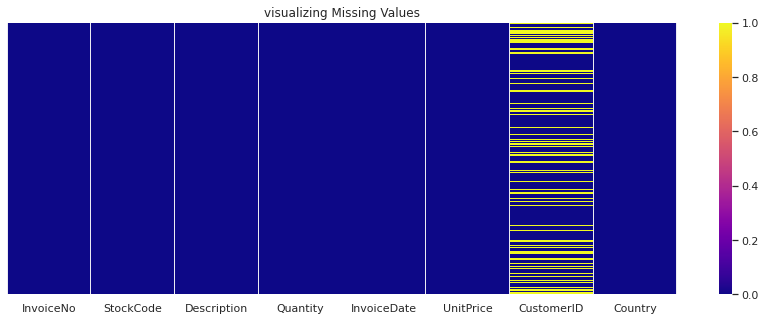

In [ ]:
# visualaizing null values using heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title("visualizing Missing Values")

# **Observations**
* **Missing values in CustomerID and Description columns.**
* **CustomerID is our identification feature so if its missing means other wont help us in analysis**
* **Dropping that all missing datapoints**

In [ ]:
#To check distribution describing dataset
df.describe(include='all')

InvoiceNo StockCode                         Description  \
count    541909.0    541909                              540455   
unique    25900.0      4070                                4223   
top      573585.0    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq       1114.0      2313                                2369   
first         NaN       NaN                                 NaN   
last          NaN       NaN                                 NaN   
mean          NaN       NaN                                 NaN   
std           NaN       NaN                                 NaN   
min           NaN       NaN                                 NaN   
25%           NaN       NaN                                 NaN   
50%           NaN       NaN                                 NaN   
75%           NaN       NaN                                 NaN   
max           NaN       NaN                                 NaN   

             Quantity          InvoiceDate      UnitPrice     CustomerID  \
count   541909.000000               541909  541909.000000  406829.000000   
unique            NaN                23260            NaN            NaN   
top               NaN  2011-10-31 14:41:00            NaN            NaN   
freq              NaN                 1114            NaN            NaN   
first             NaN  2010-12-01 08:26:00            NaN            NaN   
last              NaN  2011-12-09 12:50:00            NaN            NaN   
mean         9.552250                  NaN       4.611114   15287.690570   
std        218.081158                  NaN      96.759853    1713.600303   
min     -80995.000000                  NaN  -11062.060000   12346.000000   
25%          1.000000                  NaN       1.250000   13953.000000   
50%          3.000000                  NaN       2.080000   15152.000000   
75%         10.000000                  NaN       4.130000   16791.000000   
max      80995.000000                  NaN   38970.000000   18287.000000   

               Country  
count           541909  
unique              38  
top     United Kingdom  
freq            495478  
first              NaN  
last               NaN  
mean               NaN  
std                NaN  
min                NaN  
25%                NaN  
50%                NaN  
75%                NaN  
max                NaN

In [ ]:
# figuring data types
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Quantity', 'UnitPrice', 'CustomerID'], dtype='object')

In [ ]:
# categorical columns
categorical_columns=list(df.select_dtypes(['object']).columns)
categorical_features=pd.Index(categorical_columns)

In [ ]:
# find unique values of categorical column
def unique_name_no(col):
  print(df[col].unique())
  print(df[col].nunique())


for i in categorical_columns:
  print(i.upper())
  unique_name_no(i)

INVOICENO
[536365 536366 536367 ... 581585 581586 581587]
25900
STOCKCODE
['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]
4070
DESCRIPTION
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
4223
COUNTRY
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']
38


In [ ]:
# duplicate
len(df[df.duplicated()])

5268

In [ ]:
# Dropping Duplicate Rows
df=df.drop_duplicates()
len(df[df.duplicated()])

0

**Dataset after removing duplicate values.**

In [ ]:
df.shape

(536641, 8)

In [ ]:
#checking null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

# **Missing Value Imputation**

In [ ]:
#dropping missing values
df.dropna(inplace=True)

In [ ]:
#checking null values again
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**Now we cleaned null values**

In [ ]:
#records remaining after removing null values
df.shape

(401604, 8)

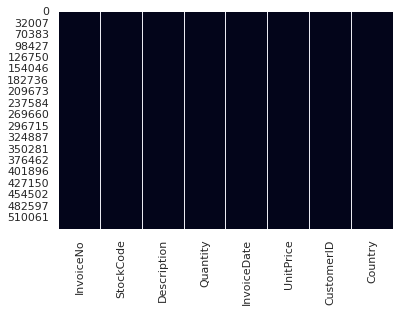

In [ ]:
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


## **After removing null and duplicate values in our dataset. It reduces to (401604, 8)**

In [ ]:
df.describe()

Quantity      UnitPrice     CustomerID
count  401604.000000  401604.000000  401604.000000
mean       12.183273       3.474064   15281.160818
std       250.283037      69.764035    1714.006089
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13939.000000
50%         5.000000       1.950000   15145.000000
75%        12.000000       3.750000   16784.000000
max     80995.000000   38970.000000   18287.000000

* **'Here we can see that min value for quantity column is negative'**
* **"Uniteprice has 0 as min value"**
* **Need to Explore thes columns'**

In [ ]:
# dataframe have negative values in quantity 
# here we observed  that Invoice number starting with C has negative values and as per description of the data those are cancelations. so we need to drop this entries.
df[df['Quantity']<0]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
...                    ...        ...         ...             ...  
540449 2011-12-09 09:57:00       0.83     14397.0  United Kingdom  
541541 2011-12-09 10:28:00     224.69     15498.0  United Kingdom  
541715 2011-12-09 11:57:00      10.95     15311.0  United Kingdom  
541716 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  
541717 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  

[8872 rows x 8 columns]

In [ ]:
# changing the datatype to str
df['InvoiceNo']=df['InvoiceNo'].astype('str')

In [ ]:
# also If InvoiceNo starts with C means it's a cancellation. We need to drop this entries.
df=df[~df['InvoiceNo'].str.contains('C')]

In [ ]:

# Checking how many values are present for unitprice==0
# almost 40 values are present so will drop this values
len(df[df['UnitPrice']==0])


40

In [ ]:
# taking unitprice values greater than 0.
df=df[df['UnitPrice']>0]
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [ ]:
df.describe()

Quantity      UnitPrice     CustomerID
count  392692.000000  392692.000000  392692.000000
mean       13.119702       3.125914   15287.843865
std       180.492832      22.241836    1713.539549
min         1.000000       0.001000   12346.000000
25%         2.000000       1.250000   13955.000000
50%         6.000000       1.950000   15150.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000    8142.750000   18287.000000

In [ ]:
df.shape

(392692, 8)

# **EDA(Exploratory Data Analysis)**

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

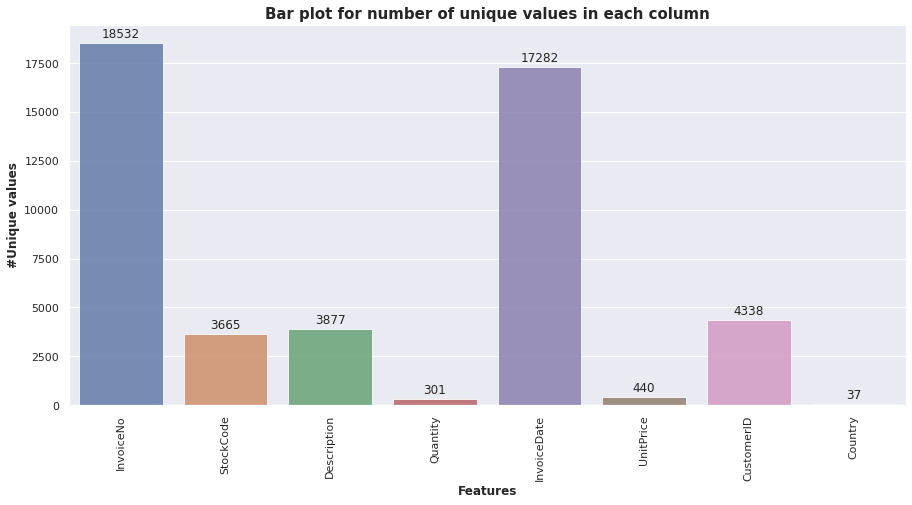

In [ ]:
#Counting unique value of features
unique_df=pd.DataFrame()
unique_df['Features']=df.columns
unique=[]
for i in df.columns:
  unique.append(df[i].nunique())
unique_df['Uniques']=unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

**Higher no. of Invoice No is justificable here as it represents no. of transections.**

In [ ]:
# Counting unique value of Description name as higher count comes first
Description_df=df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
Description_df.head()

Description_Name  Count
0  WHITE HANGING HEART T-LIGHT HOLDER   2016
1            REGENCY CAKESTAND 3 TIER   1713
2             JUMBO BAG RED RETROSPOT   1615
3       ASSORTED COLOUR BIRD ORNAMENT   1395
4                       PARTY BUNTING   1389

In [ ]:
#least count of description name
Description_df.tail()

Description_Name  Count
3872         GREEN WITH METAL BAG CHARM      1
3873         WHITE WITH METAL BAG CHARM      1
3874  BLUE/NAT SHELL NECKLACE W PENDANT      1
3875            PINK EASTER HENS+FLOWER      1
3876        PAPER CRAFT , LITTLE BIRDIE      1

**Top 5 items in terms of description(Name)**


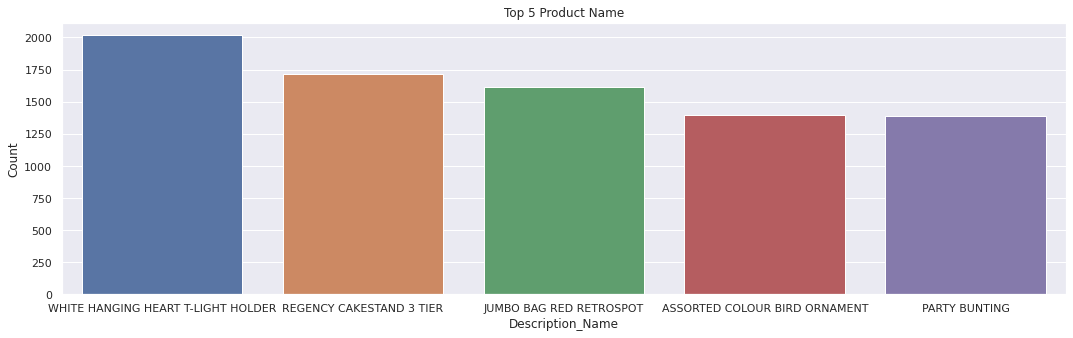

In [ ]:
#visualization of count of description name
plt.figure(figsize=(18,5))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5])

**Observations**
* **WHITE HANGING HEART T-LIGHT HOLDER is the highest selling product almost 2018 units were sold**
* **"REGENCY CAKESTAND 3 TIER is the 2nd highest selling product almost 1723 units were sold"**

# **Bottom 5 items in terms of description(Name)**

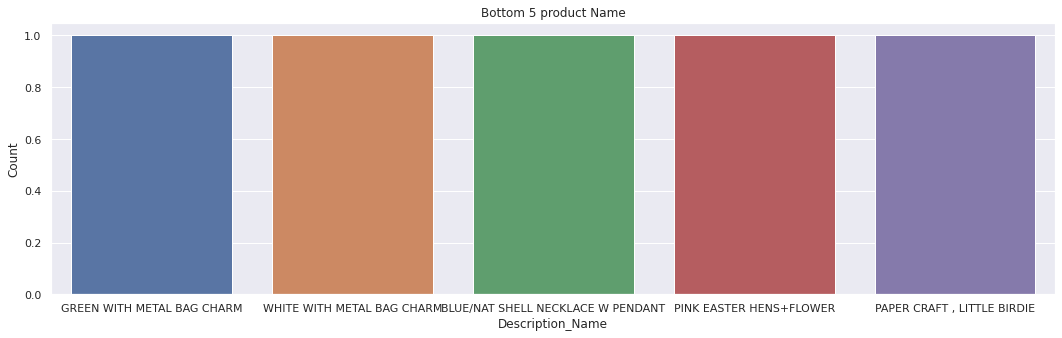

In [ ]:
#visualization of tail of description name
plt.figure(figsize=(18,5))
plt.title('Bottom 5 product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[-5:])


**Top 5 items in terms of Stockcode**

In [ ]:
#count of stockcode_name as higher count comes first
StockCode_df=df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
StockCode_df.head()

StockCode_Name  Count
0         85123A   2023
1          22423   1713
2         85099B   1615
3          84879   1395
4          47566   1389

In [ ]:
#count of stockcode from last
StockCode_df.tail()

StockCode_Name  Count
3660         90059A      1
3661          20678      1
3662         90059D      1
3663          90168      1
3664          23843      1

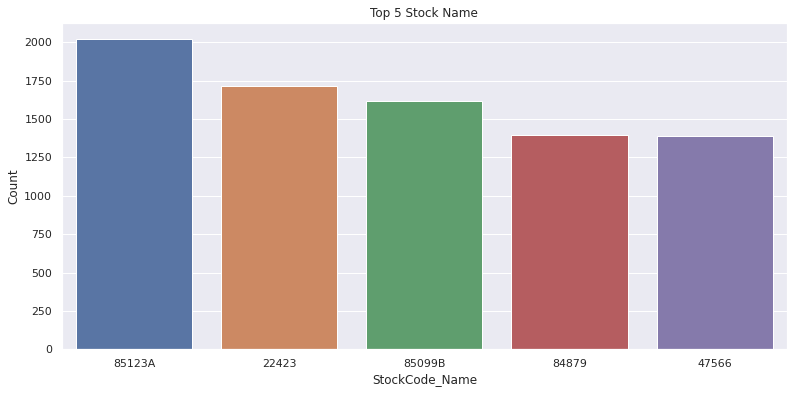

In [ ]:
# top 5 product in terms of StockCode
#visualization of count of stock name
plt.figure(figsize=(13,6))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[:5])

**Observations**
* **StockCode-85123Ais the first highest selling product.**
* **StockCode-22423 is the 2nd highest selling product.**

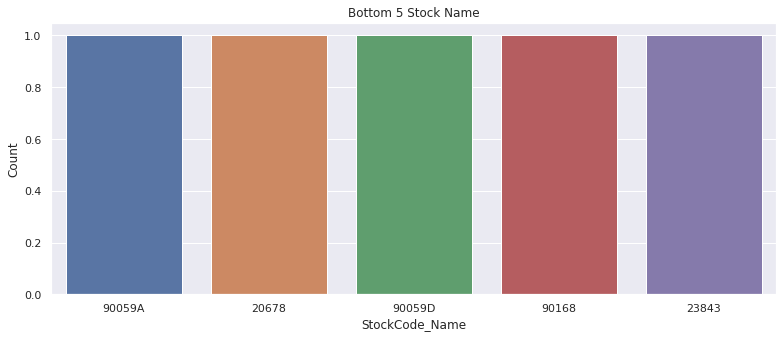

In [ ]:
#visualization
plt.figure(figsize=(13,5))
plt.title('Bottom 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[-5:])

In [ ]:
# Counting unique value of country_name as higher count comes first
country_df=df['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)
country_df.head()

Country_Name   Count
0  United Kingdom  349203
1         Germany    9025
2          France    8326
3            EIRE    7226
4           Spain    2479

In [ ]:
country_df.tail()

Country_Name  Count
32       Lithuania     35
33          Brazil     32
34  Czech Republic     25
35         Bahrain     17
36    Saudi Arabia      9

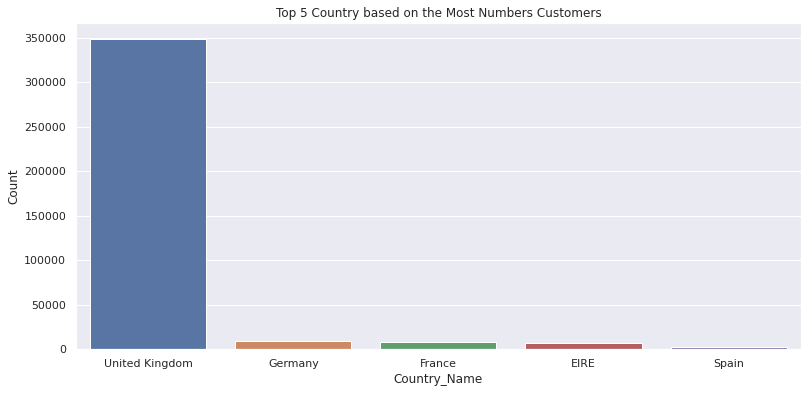

In [ ]:
#visualization of 'Top 5 Country based Most Numbers of  Customers'
plt.figure(figsize=(13,6))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[:5])

# **Observation**
* ## **UK has highest number of customers**
* ## **Germany,France and IreLand has almost equal number of customers**

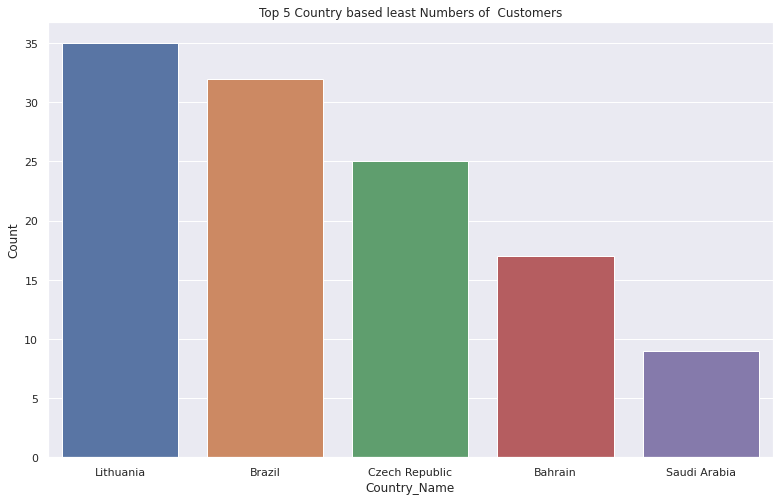

In [ ]:
# Top 5 Countries based on least number of customers
plt.figure(figsize=(13,8))
plt.title('Top 5 Country based least Numbers of  Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[-5:])

**Observations**
* **There are very less customers from Saudi Arabia**
* **Bahrain is the 2nd Country having least number of customers**

In [ ]:
#exploring 'Saudi Arabia'
df[df['Country']=='Saudi Arabia']

InvoiceNo StockCode                        Description  Quantity  \
100810    544838     22915      ASSORTED BOTTLE TOP  MAGNETS         12   
100811    544838     22363               GLASS JAR MARMALADE          6   
100812    544838     22362       GLASS JAR PEACOCK BATH SALTS         6   
100813    544838     22361  GLASS JAR DAISY FRESH COTTON WOOL         6   
100814    544838     22553             PLASTERS IN TIN SKULLS        12   
100815    544838     22555          PLASTERS IN TIN STRONGMAN        12   
100816    544838     22556     PLASTERS IN TIN CIRCUS PARADE         12   
100817    544838     20781           GOLD EAR MUFF HEADPHONES         2   
100818    544838     22969       HOMEMADE JAM SCENTED CANDLES        12   

               InvoiceDate  UnitPrice  CustomerID       Country  
100810 2011-02-24 10:34:00       0.42     12565.0  Saudi Arabia  
100811 2011-02-24 10:34:00       2.95     12565.0  Saudi Arabia  
100812 2011-02-24 10:34:00       2.95     12565.0  Saudi Arabia  
100813 2011-02-24 10:34:00       2.95     12565.0  Saudi Arabia  
100814 2011-02-24 10:34:00       1.65     12565.0  Saudi Arabia  
100815 2011-02-24 10:34:00       1.65     12565.0  Saudi Arabia  
100816 2011-02-24 10:34:00       1.65     12565.0  Saudi Arabia  
100817 2011-02-24 10:34:00       5.49     12565.0  Saudi Arabia  
100818 2011-02-24 10:34:00       1.45     12565.0  Saudi Arabia

* **Positively skewed (or right-skewed) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer.hear mean>median>mode**
* **Negatively skewed (also known as left-skewed) distribution is a type of distribution in which more values are concentrated on the right side (tail) of the distribution graph while the left tail of the distribution graph is longer.hear mean**
* **For symmetric graph mean=median=mode**

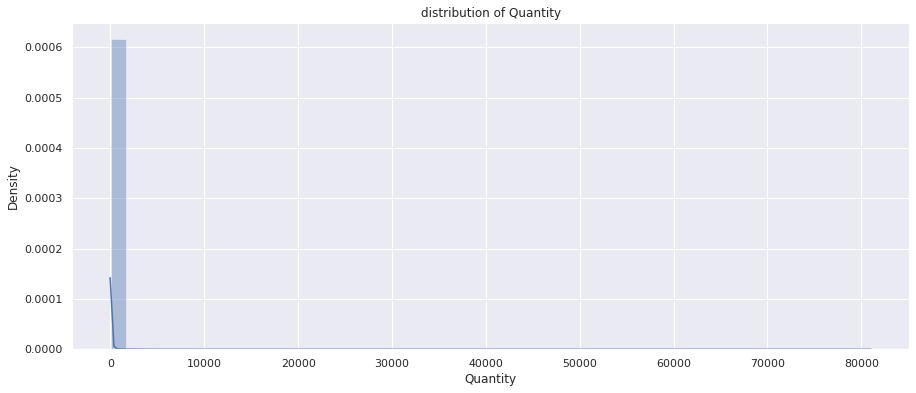

In [ ]:
#distribution of Quantity
plt.figure(figsize=(15,6))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'],color="B")

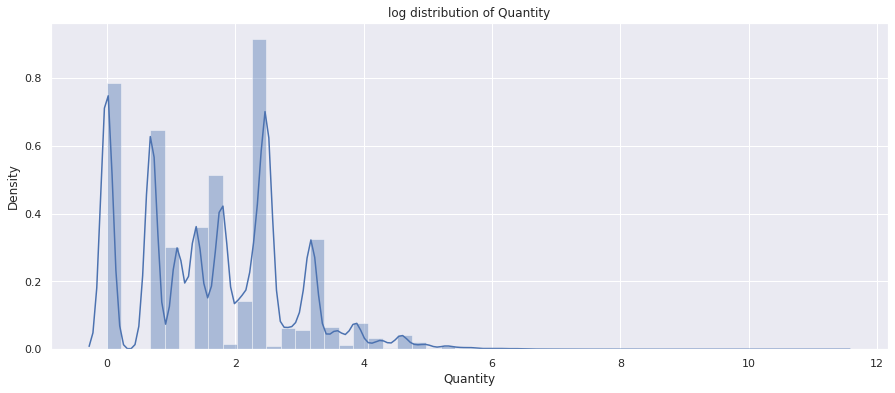

In [ ]:
#applying log distribution on quantity
plt.figure(figsize=(15,6))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color="B")

In [ ]:
#unique values of Quantity
df['Quantity'].unique()

array([    6,     8,     2,    32,     3,     4,    24,    12,    48,
          18,    20,    36,    80,    64,    10,   120,    96,    23,
           5,     1,    50,    40,   100,   192,   432,   144,   288,
          16,     9,   128,    25,    30,    28,     7,    72,   200,
         600,   480,    14,    11,    70,   252,    60,   216,   384,
          27,   108,    52,    75,   270,    42,   240,    90,   320,
          17,  1824,   204,    69,   160,  2880,  1400,    19,    39,
          56,    13,  1440,    15,   720,   156,   324,    41,   402,
         378,   150,   300,    22,    34,   408,   972,   208,  1008,
          26,  1000,  1488,   250,  1394,   400,   110,    37,    78,
          21,   272,    84,    47,  1728,    38,    53,    76,   576,
          29,  2400,   500,   180,   960,  1296,   147,   168,   256,
          54,    31,   860,  1010,  1356,  1284,   186,   114,   360,
        1930,  2000,  3114,  1300,   670,   176,   648,    62, 74215,
          89,    33,

In [ ]:
#Checking Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


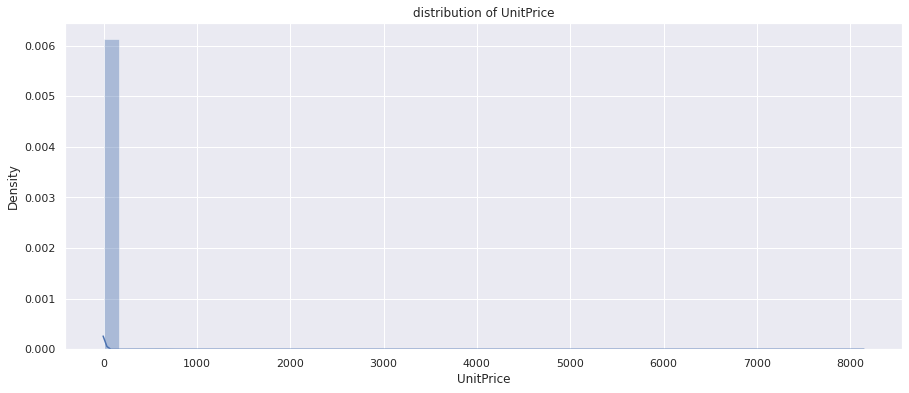

In [ ]:
#visualizing distribution of unit price
plt.figure(figsize=(15,6))
plt.title('distribution of UnitPrice')
sns.distplot(df['UnitPrice'],color="B")

In [ ]:
#checking records where unit price is less than 0
df[df['UnitPrice']<0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

In [ ]:
#keeping only records having unit price more than 0
df=df[df['UnitPrice']>0]

In [ ]:
#checking dataset
df.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

#**Feature engineering**

In [ ]:
#extracting Invoice Date
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

### **Convert InvoiceDate columns into date time format**

In [ ]:
#getting Day as feature
df['Day']=df['InvoiceDate'].dt.day_name()

### **Create a new features Day from Invoicedate**

In [ ]:
# Create some new features from Invoicedate like hours,year,month_num,day_num
df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df["month_num"] = df["InvoiceDate"].apply(lambda x: x.month)
df["day_num"] = df["InvoiceDate"].apply(lambda x: x.day)
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)

In [ ]:
df.head(2)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   

          InvoiceDate  UnitPrice  CustomerID         Country        Day  year  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  Wednesday  2010   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   

   month_num  day_num  hour  minute  
0         12        1     8      26  
1         12        1     8      26

### **Create some new features from Invoicedate like hours, year, month_num, day_num**

In [ ]:
#creating new feature (TotalAmount)
df['TotalAmount']=df['Quantity']*df['UnitPrice']

### **Create a new features TotalAmount from product of Quantity and Unitprice**

In [ ]:
# adding month name feature from Invoice Date feature
df['Month']=df['InvoiceDate'].dt.month_name()

In [ ]:
#checking changes
df.head(2)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   

          InvoiceDate  UnitPrice  CustomerID         Country        Day  year  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  Wednesday  2010   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   

   month_num  day_num  hour  minute  TotalAmount     Month  
0         12        1     8      26        15.30  December  
1         12        1     8      26        20.34  December

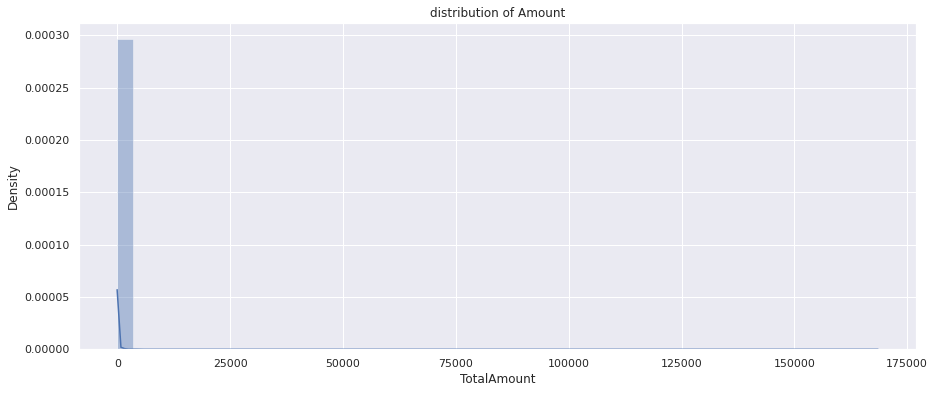

In [ ]:
#checking distribution of Total amount
plt.figure(figsize=(15,6))
plt.title('distribution of Amount')
sns.distplot(df['TotalAmount'],color="B")

In [ ]:
#get more clear view of Total Amount
df['TotalAmount'].describe()

count    392692.000000
mean         22.631500
std         311.099224
min           0.001000
25%           4.950000
50%          12.450000
75%          19.800000
max      168469.600000
Name: TotalAmount, dtype: float64

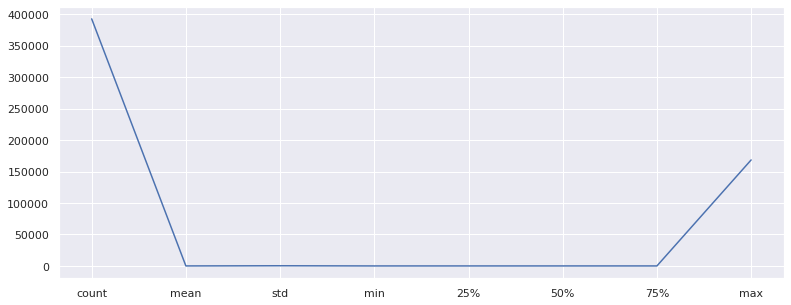

In [ ]:
#visualizing Total amount
plt.figure(figsize=(13,5))
df['TotalAmount'].describe().plot()

In [ ]:
day_df=df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

Day_Name  Count
0   Thursday  79243
1  Wednesday  68040
2    Tuesday  65744
3     Monday  64231
4     Sunday  61212
5     Friday  54222

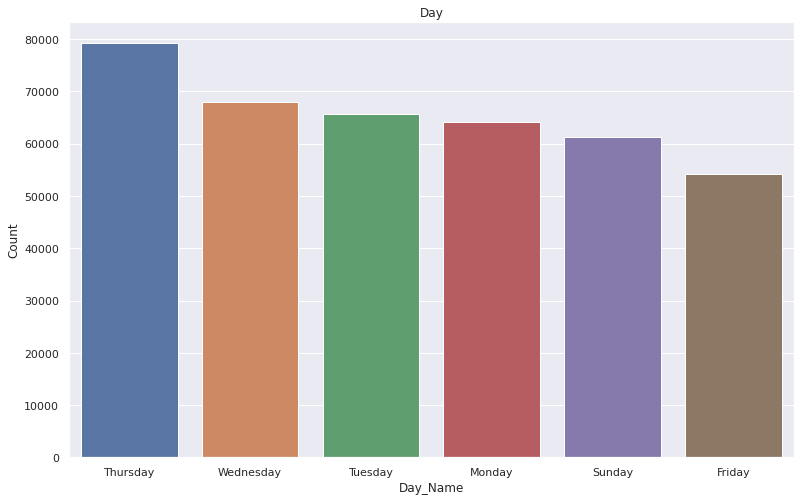

In [ ]:
plt.figure(figsize=(13,8))
plt.title('Day')
sns.barplot(x='Day_Name',y='Count',data=day_df)


#**Most of the customers have purches the items in Thursday ,Wednesday and Tuesday**

In [ ]:
month_df=df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

Month_Name  Count
0    November  63168
1     October  48793
2    December  42696
3   September  39669
4         May  28073
5        June  26926
6       March  26870
7      August  26790
8        July  26580
9       April  22433
10    January  20988
11   February  19706

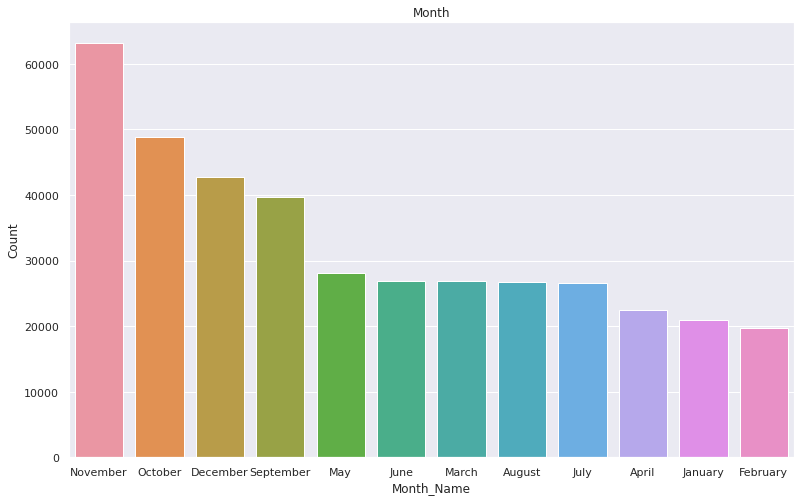

In [ ]:
# Sales count in different months.
plt.figure(figsize=(13,8))
plt.title('Month')
sns.barplot(x='Month_Name',y='Count',data=month_df)


**Observations**
* **Most of the sale happened in Novmenber month.**
* **February Month had least sales.**

In [ ]:
hour_df=df['hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'hour': 'Count'}, inplace=True)
hour_df

Hour_Name  Count
0          12  70938
1          13  63019
2          14  53251
3          11  48365
4          15  44790
5          10  37773
6          16  23715
7           9  21927
8          17  12941
9           8   8687
10         19   3233
11         18   2895
12         20    778
13          7    379
14          6      1

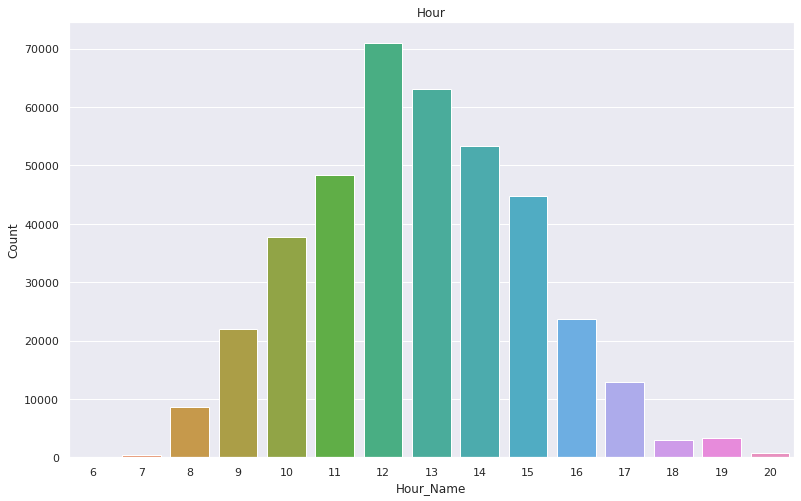

In [ ]:
plt.figure(figsize=(13,8))
plt.title('Hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df)

### **From this graph we can see that in AfterNone Time most of the customers have purches the item.**

In [ ]:
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [ ]:
df['Time_type']=df['hour'].apply(time_type)

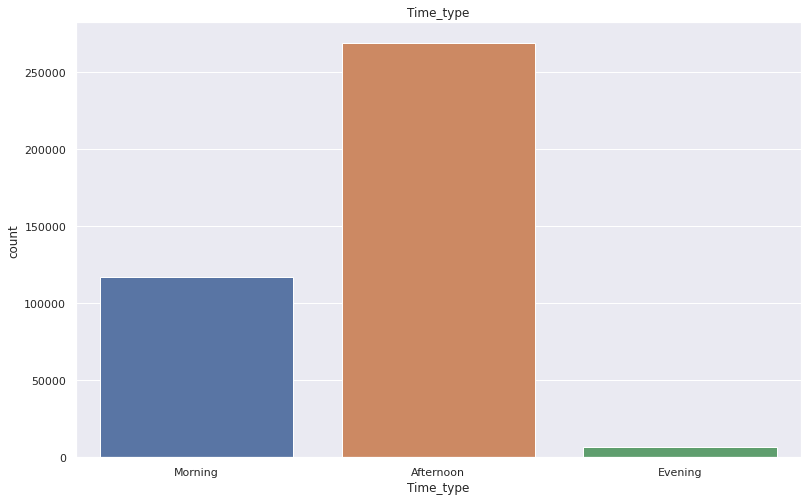

In [ ]:
plt.figure(figsize=(13,8))
plt.title('Time_type')
sns.countplot(x='Time_type',data=df)

### **Most of the customers have purches the items in Aftrnoon ,moderate numbers of customers have purches the items in Morning and least numbers of customers have purches the items in Evening**

In [ ]:
df.head(30)

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5     536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6     536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7     536366     22633               HAND WARMER UNION JACK         6   
8     536366     22632            HAND WARMER RED POLKA DOT         6   
9     536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   
10    536367     22745           POPPY'S PLAYHOUSE BEDROOM          6   
11    536367     22748            POPPY'S PLAYHOUSE KITCHEN         6   
12    536367     22749    FELTCRAFT PRINCESS CHARLOTTE DOLL         8   
13    536367     22310              IVORY KNITTED MUG COSY          6   
14    536367     84969   BOX OF 6 ASSORTED COLOUR TEASPOONS         6   
15    536367     22623        BOX OF VINTAGE JIGSAW BLOCKS          3   
16    536367     22622       BOX OF VINTAGE ALPHABET BLOCKS         2   
17    536367     21754             HOME BUILDING BLOCK WORD         3   
18    536367     21755             LOVE BUILDING BLOCK WORD         3   
19    536367     21777          RECIPE BOX WITH METAL HEART         4   
20    536367     48187                  DOORMAT NEW ENGLAND         4   
21    536368     22960             JAM MAKING SET WITH JARS         6   
22    536368     22913          RED COAT RACK PARIS FASHION         3   
23    536368     22912       YELLOW COAT RACK PARIS FASHION         3   
24    536368     22914         BLUE COAT RACK PARIS FASHION         3   
25    536369     21756             BATH BUILDING BLOCK WORD         3   
26    536370     22728            ALARM CLOCK BAKELIKE PINK        24   
27    536370     22727            ALARM CLOCK BAKELIKE RED         24   
28    536370     22726           ALARM CLOCK BAKELIKE GREEN        12   
29    536370     21724      PANDA AND BUNNIES STICKER SHEET        12   

           InvoiceDate  UnitPrice  CustomerID         Country        Day  \
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  Wednesday   
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday   
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  Wednesday   
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday   
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday   
5  2010-12-01 08:26:00       7.65     17850.0  United Kingdom  Wednesday   
6  2010-12-01 08:26:00       4.25     17850.0  United Kingdom  Wednesday   
7  2010-12-01 08:28:00       1.85     17850.0  United Kingdom  Wednesday   
8  2010-12-01 08:28:00       1.85     17850.0  United Kingdom  Wednesday   
9  2010-12-01 08:34:00       1.69     13047.0  United Kingdom  Wednesday   
10 2010-12-01 08:34:00       2.10     13047.0  United Kingdom  Wednesday   
11 2010-12-01 08:34:00       2.10     13047.0  United Kingdom  Wednesday   
12 2010-12-01 08:34:00       3.75     13047.0  United Kingdom  Wednesday   
13 2010-12-01 08:34:00       1.65     13047.0  United Kingdom  Wednesday   
14 2010-12-01 08:34:00       4.25     13047.0  United Kingdom  Wednesday   
15 2010-12-01 08:34:00       4.95     13047.0  United Kingdom  Wednesday   
16 2010-12-01 08:34:00       9.95     13047.0  United Kingdom  Wednesday   
17 2010-12-01 08:34:00       5.95     13047.0  United Kingdom  Wednesday   
18 2010-12-01 08:34:00       5.95     13047.0  United Kingdom  Wednesday   
19 2010-12-01 08:34:00       7.95     13047.0  United Kingdom  Wednesday   
20 2010-12-01 08:34:00       7.95     13047.0  United Kingdom  Wednesday   
21 2010-12-01 08:34:00       4.25     13047.0  United Kingdom  Wedn

# **Create the RFM model (Recency, Frequency,Monetary value)**
### **Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors: . Frequency: How often a customer makes a purchase. Monetary Value: How much money a customer spends on**
##**Performing RFM Segmentation and RFM Analysis, Step by Step**
The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer. ... The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M), using Excel or another tool.

## **Calculating RFM scores**
The number is typically 3 or 5. If you decide to code each RFM attribute into 3 categories, you'll end up with 27 different coding combinations ranging from a high of 333 to a low of 111. Generally speaking, the higher the RFM score, the more valuable the customer.

In [ ]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      310         17    334.40

In [ ]:
#Descriptive Statistics (Recency)
rfm_df.Recency.describe()

count    4338.000000
mean       92.059474
std       100.012264
min         0.000000
25%        17.000000
50%        50.000000
75%       141.750000
max       373.000000
Name: Recency, dtype: float64

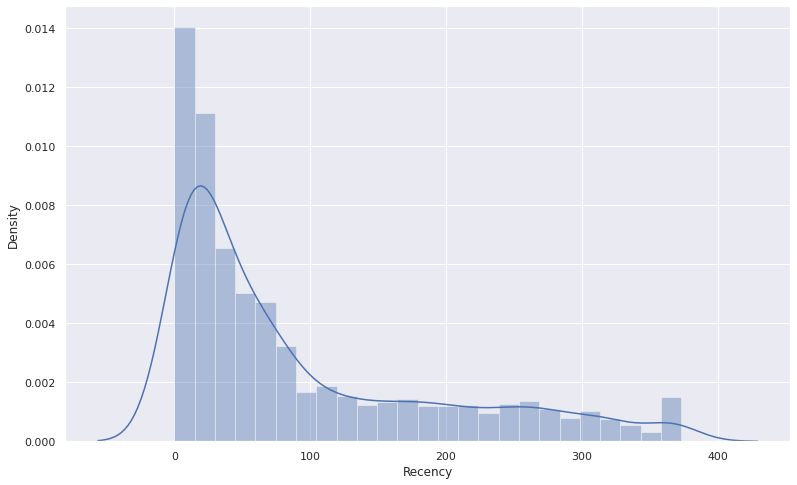

In [ ]:
#Recency distribution plot
import seaborn as sns
x = rfm_df['Recency']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [ ]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

count    4338.000000
mean       90.523744
std       225.506968
min         1.000000
25%        17.000000
50%        41.000000
75%        98.000000
max      7676.000000
Name: Frequency, dtype: float64

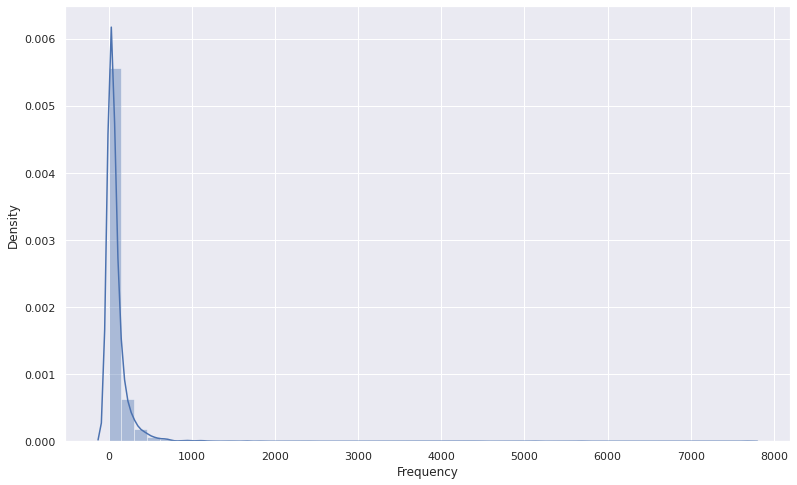

In [ ]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = rfm_df['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [ ]:
# Descriptive Statistics(Monetary)
rfm_df.Monetary.describe()

count      4338.000000
mean       2048.688081
std        8985.230220
min           3.750000
25%         306.482500
50%         668.570000
75%        1660.597500
max      280206.020000
Name: Monetary, dtype: float64

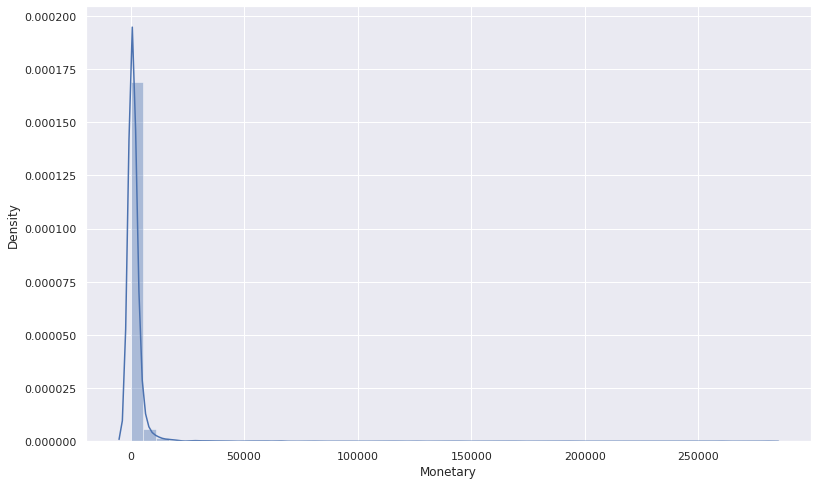

In [ ]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = rfm_df['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(x)

# **Split into four segments using quantiles**

In [ ]:
# split into four segments using quantiles
quantiles=rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles=quantiles.to_dict()

In [ ]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Monetary': {0.25: 306.48249999999996,
  0.5: 668.5700000000002,
  0.75: 1660.5974999999999}}

In [ ]:
# Functions to create R,F and M segments
def RScoring(x,p,d):
  if x<=d[p][0.25]:
    return 1
  elif x<=d[p][0.25]:
    return 2
  elif x<=d[p][0.75]:
    return 3
  else:
    return 4

def FnMScoring(x,p,d):
  if x<=d[p][0.25]:
    return 4
  elif x<= d[p][0.50]:
    return 3
  elif x<= d[p][0.75]:
    return 2
  else:
    return 1

In [ ]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346.0         325          1  77183.60  4  4  1
12347.0           2        182   4310.00  1  1  1
12348.0          75         31   1797.24  3  3  1
12349.0          18         73   1757.55  3  2  1
12350.0         310         17    334.40  4  4  3

In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore
CustomerID                                                          
12346.0         325          1  77183.60  4  4  1      441         9
12347.0           2        182   4310.00  1  1  1      111         3
12348.0          75         31   1797.24  3  3  1      331         7
12349.0          18         73   1757.55  3  2  1      321         6
12350.0         310         17    334.40  4  4  3      443        11

In [ ]:
rfm_df['RFMScore'].unique()

array([ 9,  3,  7,  6, 11, 12,  8,  5, 10,  4])

In [ ]:
# Assign Loyelty Level to each customer
Loyalty_Level = ['Platinaum','Gold','Silver','Bronz']

Score_cut = pd.qcut(rfm_df['RFMScore'],q = 4,labels=Loyalty_Level)
rfm_df['RFM_Loyalty_Level'] = Score_cut.values
rfm_df.reset_index().head()

CustomerID  Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
0     12346.0      325          1  77183.60  4  4  1      441         9   
1     12347.0        2        182   4310.00  1  1  1      111         3   
2     12348.0       75         31   1797.24  3  3  1      331         7   
3     12349.0       18         73   1757.55  3  2  1      321         6   
4     12350.0      310         17    334.40  4  4  3      443        11   

  RFM_Loyalty_Level  
0            Silver  
1         Platinaum  
2              Gold  
3              Gold  
4             Bronz

In [ ]:
rfm_df['RFMScore'].unique()

array([ 9,  3,  7,  6, 11, 12,  8,  5, 10,  4])

In [ ]:
# Validate the data For RFM group = 111
rfm_df[rfm_df['RFMGroup'] == '111'].sort_values("Monetary",ascending = False).reset_index().head(10)


CustomerID  Recency  Frequency   Monetary  R  F  M RFMGroup  RFMScore  \
0     14646.0        1       2076  280206.02  1  1  1      111         3   
1     18102.0        0        431  259657.30  1  1  1      111         3   
2     17450.0        8        336  194390.79  1  1  1      111         3   
3     14911.0        1       5670  143711.17  1  1  1      111         3   
4     14156.0        9       1395  117210.08  1  1  1      111         3   
5     17511.0        2        963   91062.38  1  1  1      111         3   
6     16684.0        4        277   66653.56  1  1  1      111         3   
7     14096.0        4       5111   65164.79  1  1  1      111         3   
8     13694.0        3        568   65039.62  1  1  1      111         3   
9     15311.0        0       2366   60632.75  1  1  1      111         3   

  RFM_Loyalty_Level  
0         Platinaum  
1         Platinaum  
2         Platinaum  
3         Platinaum  
4         Platinaum  
5         Platinaum  
6         Platinaum  
7         Platinaum  
8         Platinaum  
9         Platinaum

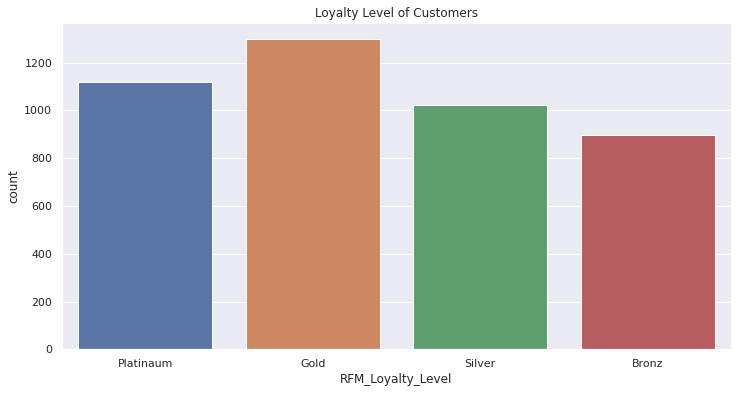

In [ ]:
# Plot the loyelty level
plt.figure(figsize=(12,6))
sns.countplot(rfm_df['RFM_Loyalty_Level'])
plt.title('Loyalty Level of Customers')
plt.show()

In [ ]:
#Folowing table contains our target peoples
rfm_df[rfm_df['RFM_Loyalty_Level'] == 'Platinaum'].sort_values("Monetary",ascending = False).reset_index().head(10)


CustomerID  Recency  Frequency   Monetary  R  F  M RFMGroup  RFMScore  \
0     14646.0        1       2076  280206.02  1  1  1      111         3   
1     18102.0        0        431  259657.30  1  1  1      111         3   
2     17450.0        8        336  194390.79  1  1  1      111         3   
3     14911.0        1       5670  143711.17  1  1  1      111         3   
4     12415.0       24        714  124914.53  3  1  1      311         5   
5     14156.0        9       1395  117210.08  1  1  1      111         3   
6     17511.0        2        963   91062.38  1  1  1      111         3   
7     16029.0       38        241   80850.84  3  1  1      311         5   
8     16684.0        4        277   66653.56  1  1  1      111         3   
9     14096.0        4       5111   65164.79  1  1  1      111         3   

  RFM_Loyalty_Level  
0         Platinaum  
1         Platinaum  
2         Platinaum  
3         Platinaum  
4         Platinaum  
5         Platinaum  
6         Platinaum  
7         Platinaum  
8         Platinaum  
9         Platinaum

In [ ]:
segmentation_based_on_RFM=rfm_df[['Recency','Frequency','Monetary','RFM_Loyalty_Level']]


In [ ]:
segmentation_based_on_RFM.groupby('RFM_Loyalty_Level').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})


Recency            Frequency               Monetary  \
                         mean min  max        mean min   max         mean   
RFM_Loyalty_Level                                                           
Platinaum           18.207513   0  140  238.480322  20  7676  5660.267764   
Gold                63.789231   0  372   68.151538   1   521  1350.118809   
Silver             121.260742   1  373   27.217773   1    98   614.235178   
Bronz              191.853795  18  373   10.717634   1    39   195.198951   

                                            
                      min        max count  
RFM_Loyalty_Level                           
Platinaum          316.25  280206.02  1118  
Gold               114.34  168472.50  1300  
Silver              35.40   77183.60  1024  
Bronz                3.75     660.00   896

In [ ]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

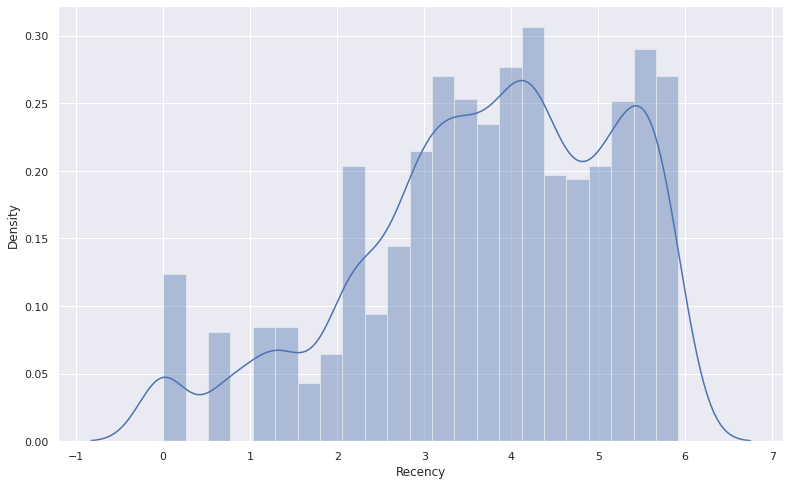

In [ ]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(13,8))
sns.distplot(Recency_Plot)


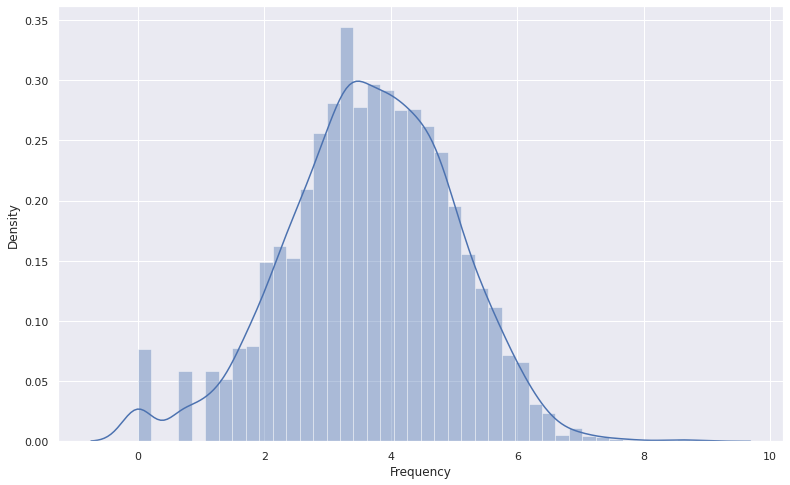

In [ ]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(Frequency_Plot)

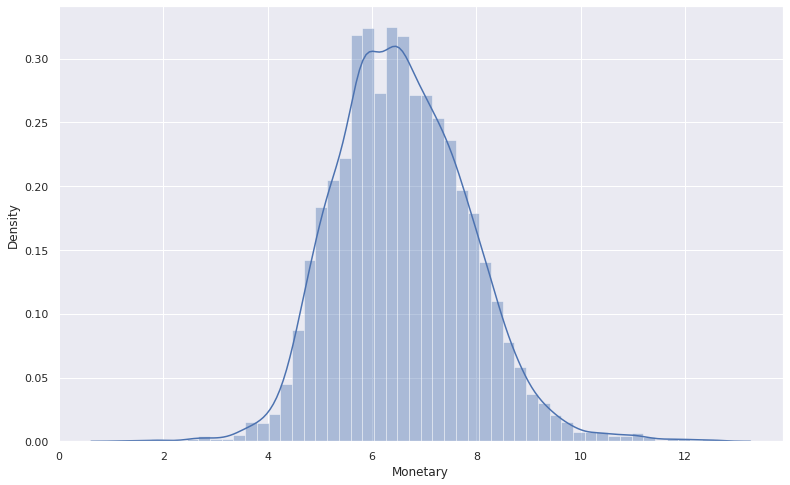

In [ ]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(Monetary_Plot)

In [ ]:
from sklearn import preprocessing
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

# **K-Means Clustering**
## **Applying Silhouette Score Method on Recency and Monetary**

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4207311225472853
For n_clusters = 3, silhouette score is 0.3427491939502174
For n_clusters = 4, silhouette score is 0.365040273826764
For n_clusters = 5, silhouette score is 0.33996351493307714
For n_clusters = 6, silhouette score is 0.34473476099101463
For n_clusters = 7, silhouette score is 0.34892162760042844
For n_clusters = 8, silhouette score is 0.3379633550451048
For n_clusters = 9, silhouette score is 0.3458690365018091
For n_clusters = 10, silhouette score is 0.34770111777016427
For n_clusters = 11, silhouette score is 0.33663230013727924
For n_clusters = 12, silhouette score is 0.33999432805353114
For n_clusters = 13, silhouette score is 0.34198059345025084
For n_clusters = 14, silhouette score is 0.3455527746016807
For n_clusters = 15, silhouette score is 0.33500286931259143


# **Calculation of Silhouette score**
**Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:**
* **Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.**
* **Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.**

**The Silhouette Coefficient for a sample is** 
 
**S=(b-a)/max(a,b)**

# **Applying Elbow Method on Recency and Monetary**

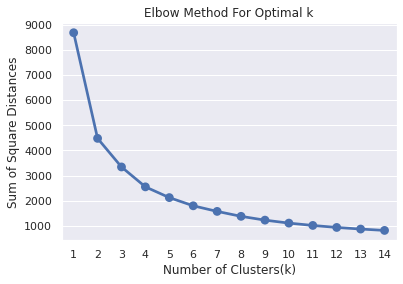

In [ ]:
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

In [ ]:
#Find the clusters for the observation given in the dataset
rfm_df['Cluster_based_rec_mon'] = kmeans.labels_
rfm_df.head(10)

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346.0         325          1  77183.60  4  4  1      441         9   
12347.0           2        182   4310.00  1  1  1      111         3   
12348.0          75         31   1797.24  3  3  1      331         7   
12349.0          18         73   1757.55  3  2  1      321         6   
12350.0         310         17    334.40  4  4  3      443        11   
12352.0          36         85   2506.04  3  2  1      321         6   
12353.0         204          4     89.00  4  4  4      444        12   
12354.0         232         58   1079.40  4  2  2      422         8   
12355.0         214         13    459.40  4  4  3      443        11   
12356.0          22         59   2811.43  3  2  1      321         6   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  \
CustomerID                                                               
12346.0               Silver     5.783825       0.000000     11.253942   
12347.0            Platinaum     0.693147       5.204007      8.368693   
12348.0                 Gold     4.317488       3.433987      7.494007   
12349.0                 Gold     2.890372       4.290459      7.471676   
12350.0                Bronz     5.736572       2.833213      5.812338   
12352.0                 Gold     3.583519       4.442651      7.826459   
12353.0                Bronz     5.318120       1.386294      4.488636   
12354.0                 Gold     5.446737       4.060443      6.984161   
12355.0                Bronz     5.365976       2.564949      6.129921   
12356.0                 Gold     3.091042       4.077537      7.941449   

            Cluster_based_rec_mon  
CustomerID                         
12346.0                         1  
12347.0                         1  
12348.0                         1  
12349.0                         1  
12350.0                         0  
12352.0                         1  
12353.0                         0  
12354.0                         0  
12355.0                         0  
12356.0                         1

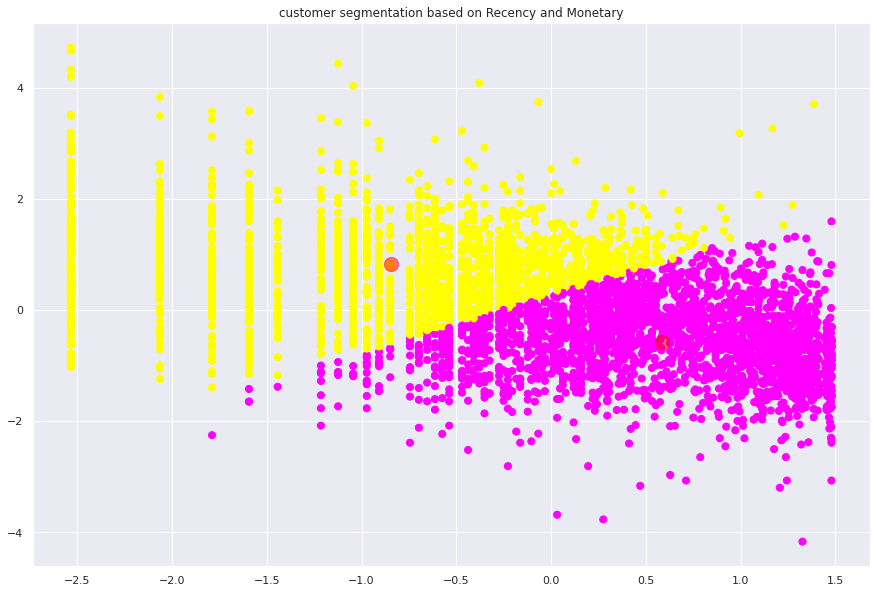

In [ ]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

# **we see that ,Customers are well separate when we cluster them by Recency and Monetary**

# **Applying DBSCAN on Recency and Monetary**

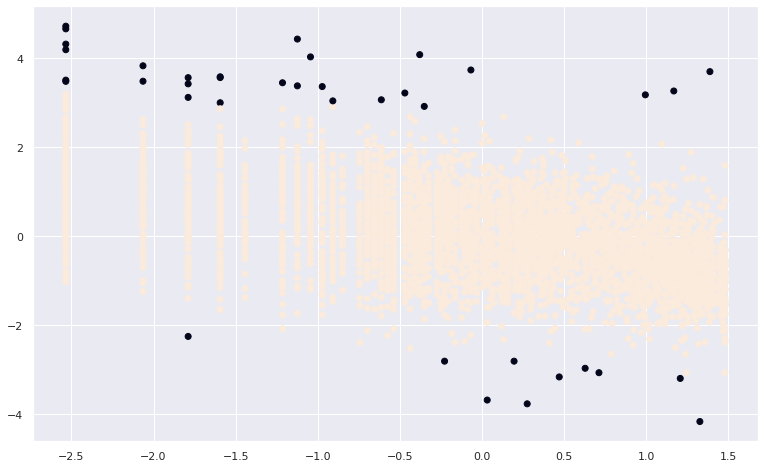

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)


## **we see that ,Customers are well separate when we cluster them by Recency and Monetary**

# **Applying silhouette Score Method on Frquency and Monetary**

In [ ]:
features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=rfm_df[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.47878955165437487
For n_clusters = 3, silhouette score is 0.40765185551085575
For n_clusters = 4, silhouette score is 0.37209909785837036
For n_clusters = 5, silhouette score is 0.3467394021038058
For n_clusters = 6, silhouette score is 0.364430854308104
For n_clusters = 7, silhouette score is 0.34437827513458963
For n_clusters = 8, silhouette score is 0.35204886038508226
For n_clusters = 9, silhouette score is 0.34573854951019156
For n_clusters = 10, silhouette score is 0.35964275798657014
For n_clusters = 11, silhouette score is 0.34127529518002286
For n_clusters = 12, silhouette score is 0.3548585654353163
For n_clusters = 13, silhouette score is 0.36337273595005365
For n_clusters = 14, silhouette score is 0.35734609483539337
For n_clusters = 15, silhouette score is 0.35722667224544963


# **Applying Elbow Method on Frequency and Monetary**

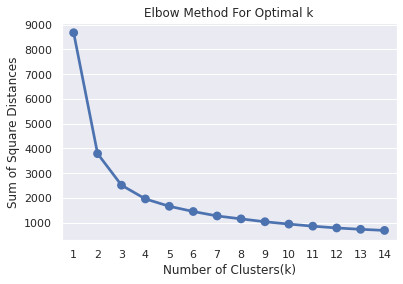

In [ ]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

In [ ]:
#Find the clusters for the observation given in the dataset
rfm_df['Cluster_based_fre_mon'] = kmeans.labels_
rfm_df.head(10)

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346.0         325          1  77183.60  4  4  1      441         9   
12347.0           2        182   4310.00  1  1  1      111         3   
12348.0          75         31   1797.24  3  3  1      331         7   
12349.0          18         73   1757.55  3  2  1      321         6   
12350.0         310         17    334.40  4  4  3      443        11   
12352.0          36         85   2506.04  3  2  1      321         6   
12353.0         204          4     89.00  4  4  4      444        12   
12354.0         232         58   1079.40  4  2  2      422         8   
12355.0         214         13    459.40  4  4  3      443        11   
12356.0          22         59   2811.43  3  2  1      321         6   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  \
CustomerID                                                               
12346.0               Silver     5.783825       0.000000     11.253942   
12347.0            Platinaum     0.693147       5.204007      8.368693   
12348.0                 Gold     4.317488       3.433987      7.494007   
12349.0                 Gold     2.890372       4.290459      7.471676   
12350.0                Bronz     5.736572       2.833213      5.812338   
12352.0                 Gold     3.583519       4.442651      7.826459   
12353.0                Bronz     5.318120       1.386294      4.488636   
12354.0                 Gold     5.446737       4.060443      6.984161   
12355.0                Bronz     5.365976       2.564949      6.129921   
12356.0                 Gold     3.091042       4.077537      7.941449   

            Cluster_based_rec_mon  Cluster_based_fre_mon  
CustomerID                                                
12346.0                         1                      0  
12347.0                         1                      0  
12348.0                         1                      0  
12349.0                         1                      0  
12350.0                         0                      1  
12352.0                         1                      0  
12353.0                         0                      1  
12354.0                         0                      0  
12355.0                         0                      1  
12356.0                         1                      0

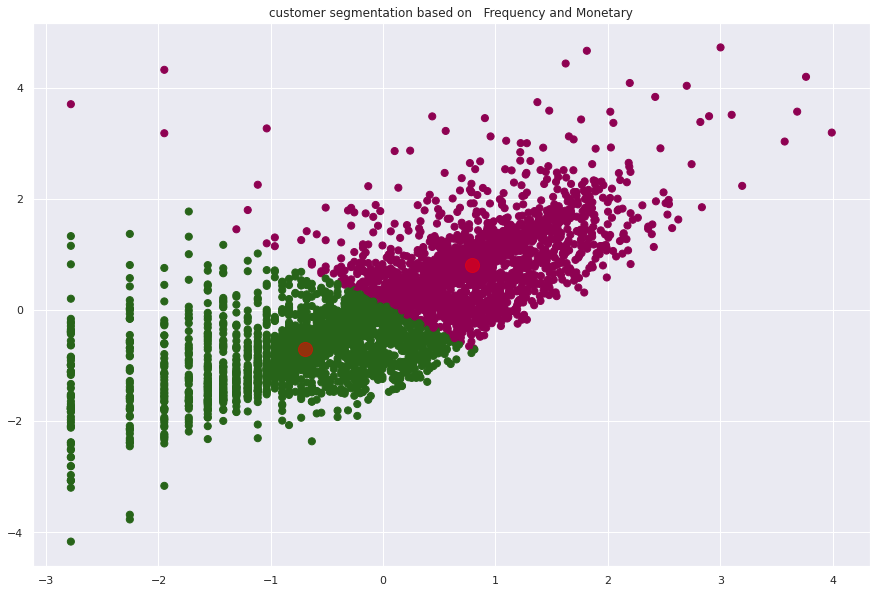

In [ ]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on   Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PiYG')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

## **we see that ,Customers are well separate when we cluster them by Frequency and Monetary**

# **Applying DBSCAN to Method on Frquency and Monetary**

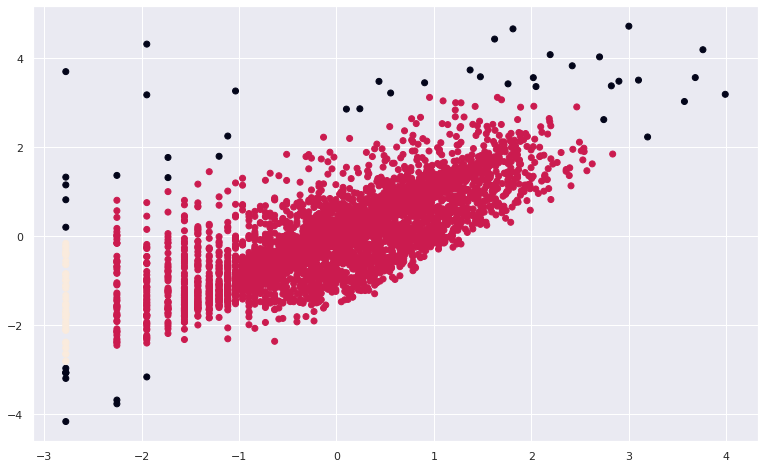

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

## **we see that ,Customers are well separate when we cluster them by Frequency and Monetary**

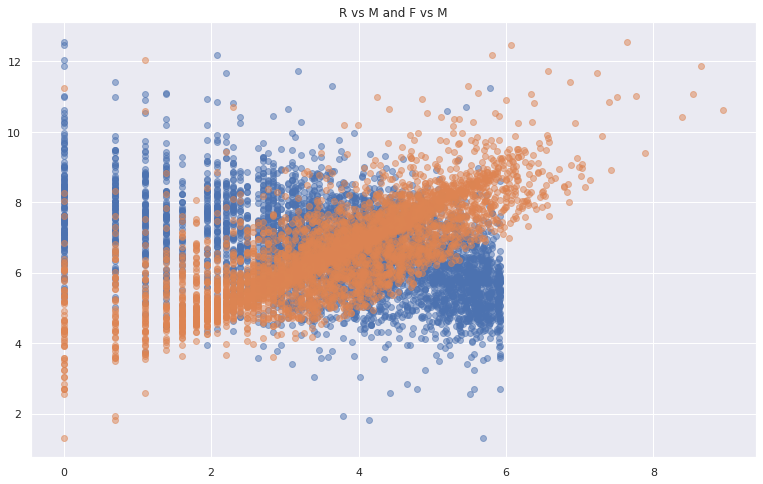

In [ ]:
plt.figure(figsize=(13,8))
plt.title('R vs M and F vs M')
plt.scatter(rfm_df.Recency_log,rfm_df.Monetary_log,alpha=0.5)
plt.scatter(rfm_df.Frequency_log,rfm_df.Monetary_log,alpha=0.5)

# **3D visualization of Recency ,Frequency and Monetary**

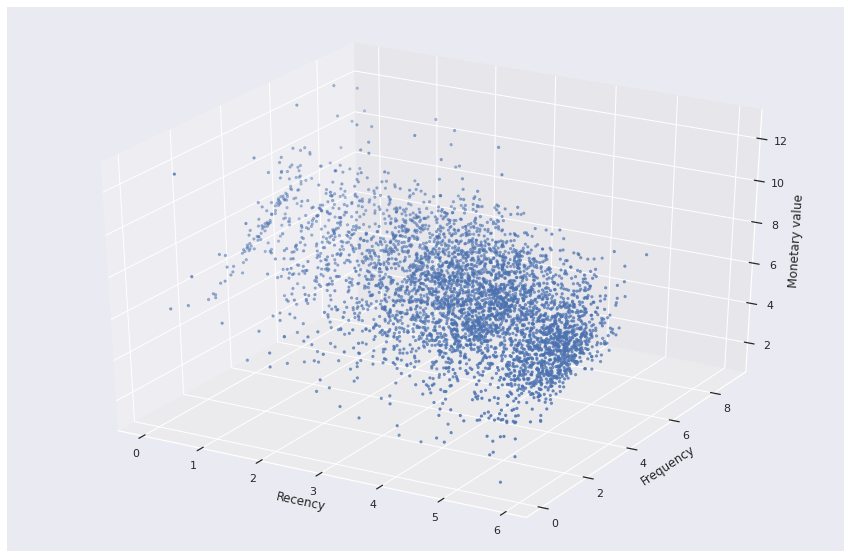

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(15,10))
plt.title('3d visualization of Recency Frequency and Monetary')
ax=fig.add_subplot(111,projection='3d')
xs=rfm_df.Recency_log
ys=rfm_df.Frequency_log
zs=rfm_df.Monetary_log
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

# **Applying Silhouette Method on Recency ,Frequency and Monetary**

In [ ]:
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features=rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

For n_clusters = 2 The average silhouette_score is : 0.39559432494517566
For n_clusters = 3 The average silhouette_score is : 0.3058876637738773
For n_clusters = 4 The average silhouette_score is : 0.3028850229495839
For n_clusters = 5 The average silhouette_score is : 0.2792649772843255
For n_clusters = 6 The average silhouette_score is : 0.27928761515967193
For n_clusters = 7 The average silhouette_score is : 0.2682462889803735
For n_clusters = 8 The average silhouette_score is : 0.2642066237713513
For n_clusters = 9 The average silhouette_score is : 0.25352442378461204
For n_clusters = 10 The average silhouette_score is : 0.2648431840242154
For n_clusters = 11 The average silhouette_score is : 0.2591906637856541
For n_clusters = 12 The average silhouette_score is : 0.26301779821497384
For n_clusters = 13 The average silhouette_score is : 0.2625620366156386
For n_clusters = 14 The average silhouette_score is : 0.2541667131220692
For n_clusters = 15 The average silhouette_score is : 0

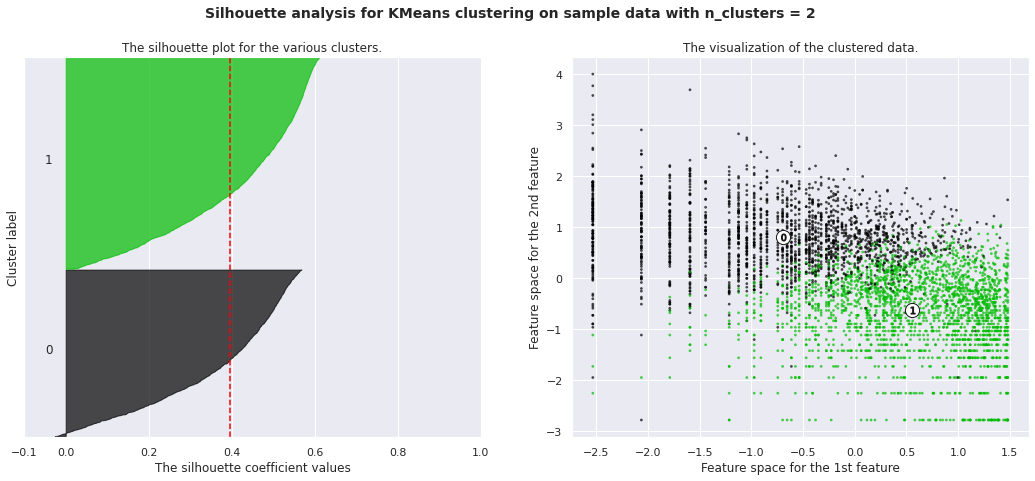

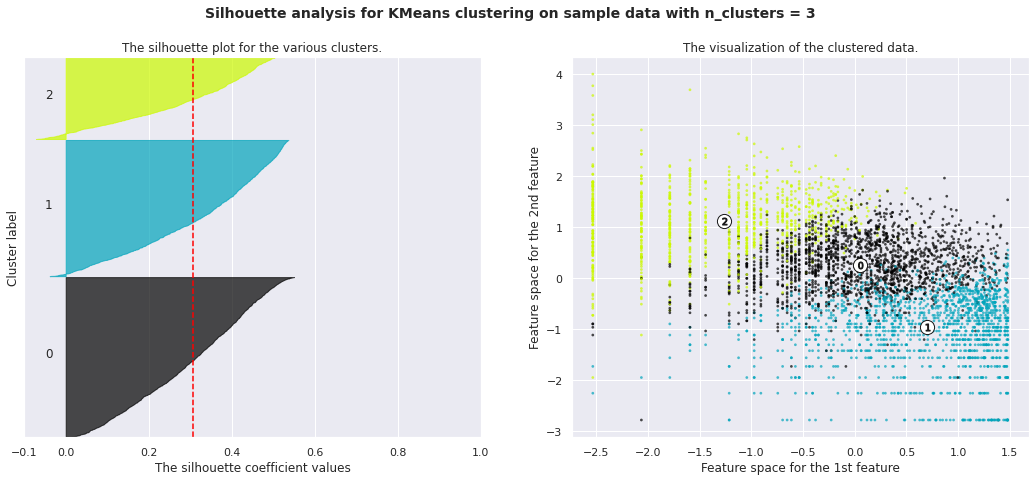

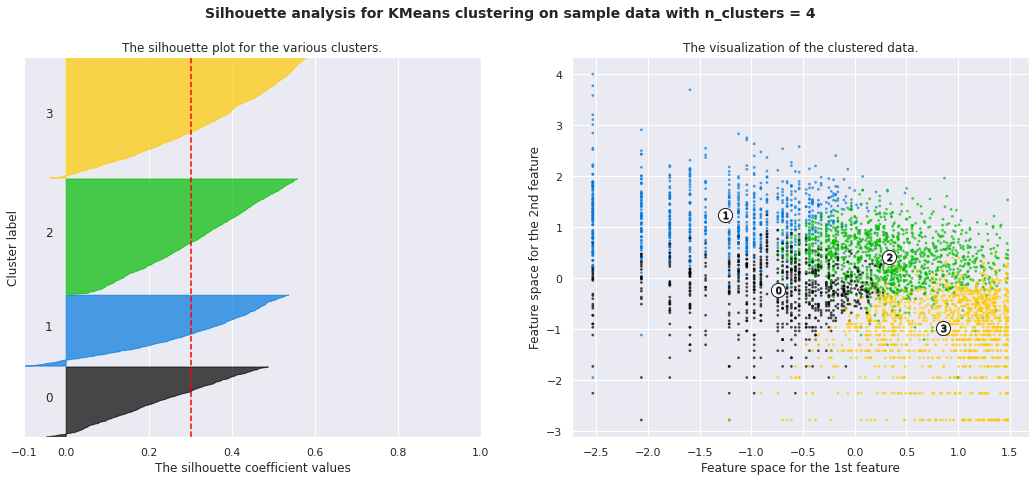

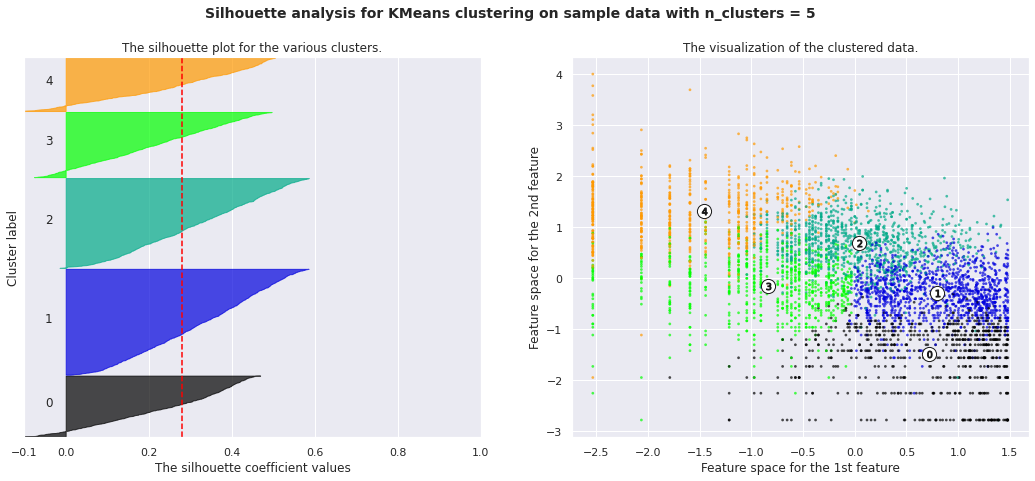

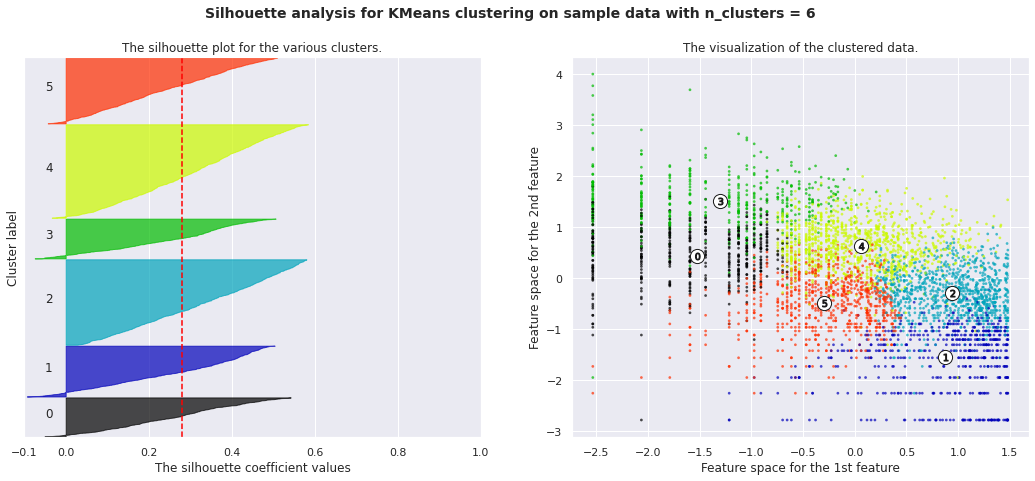

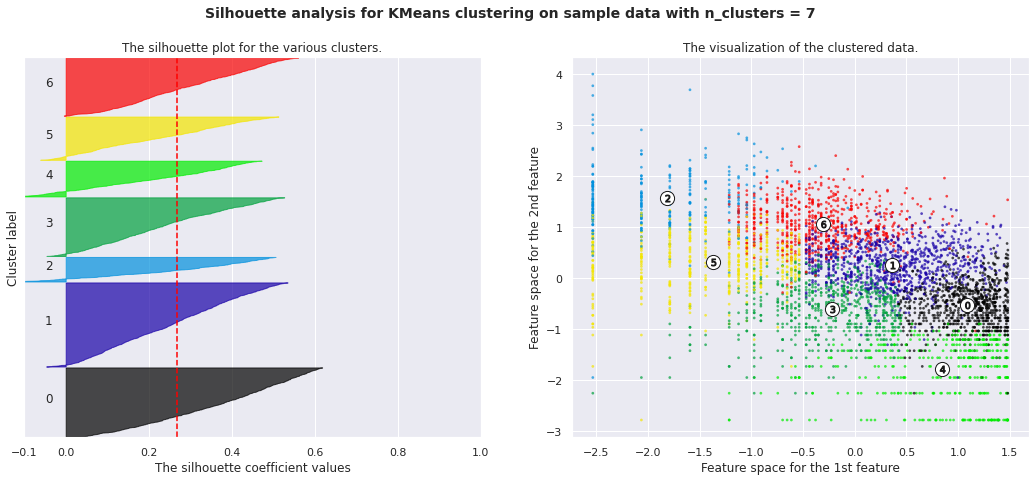

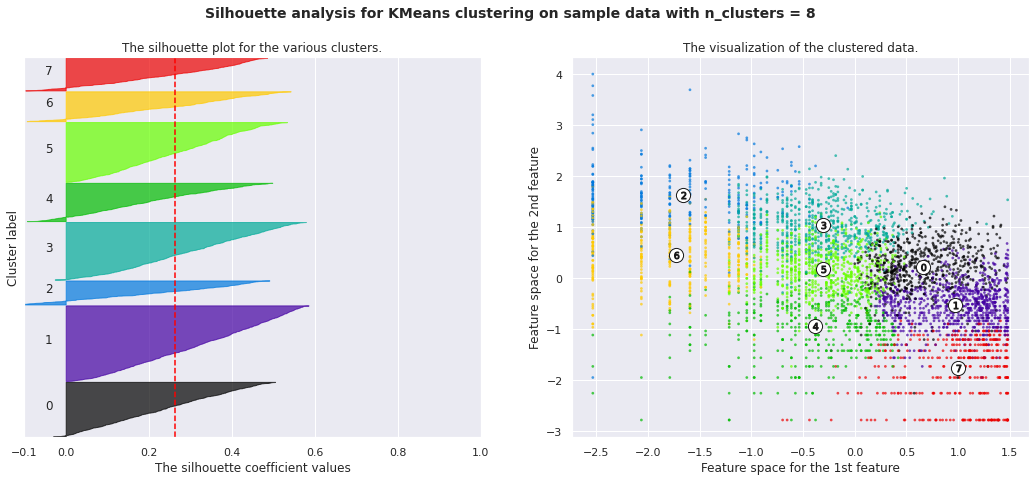

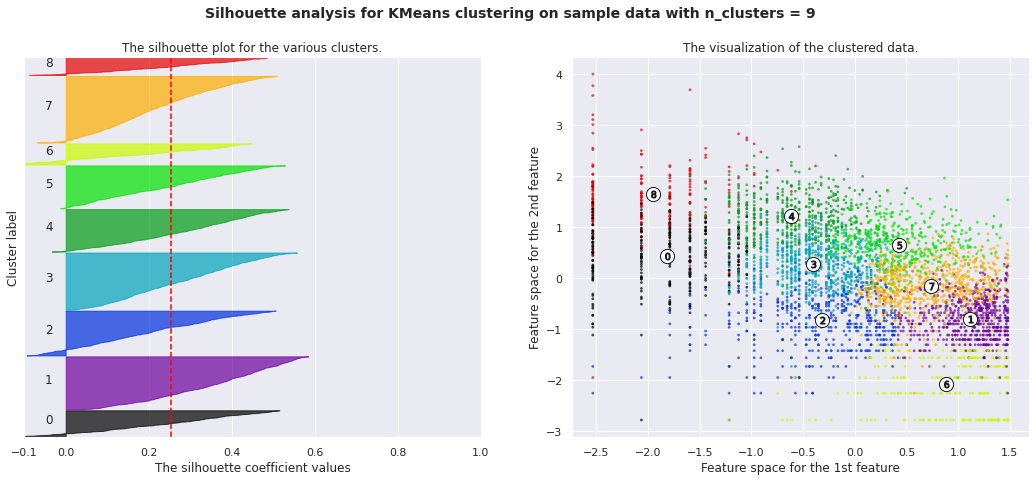

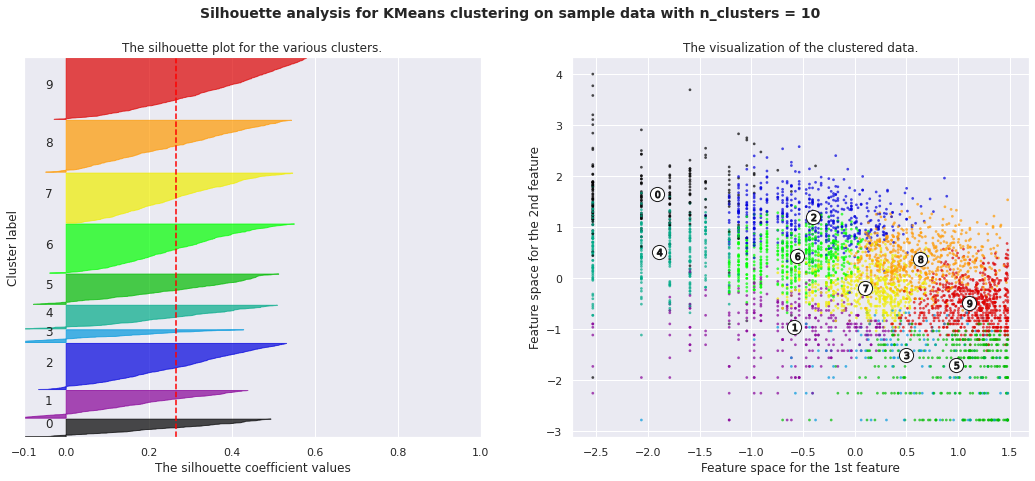

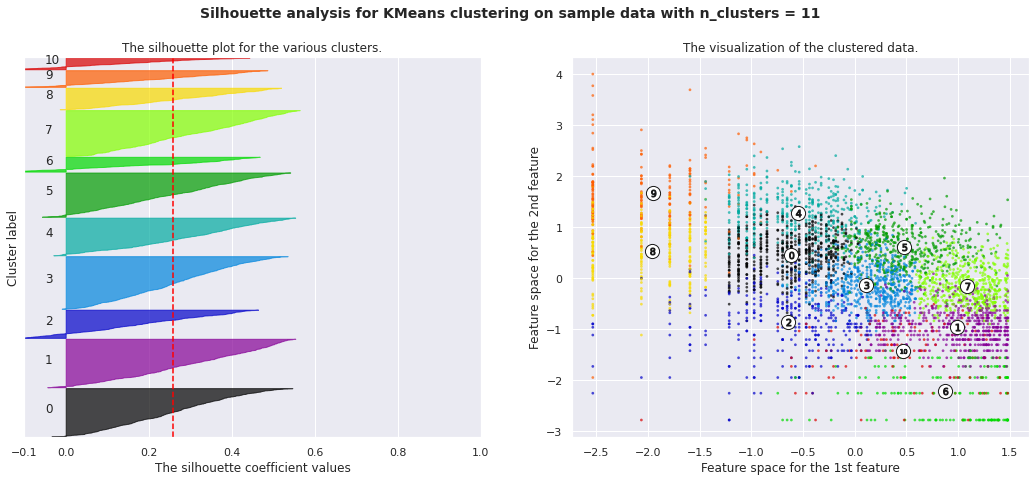

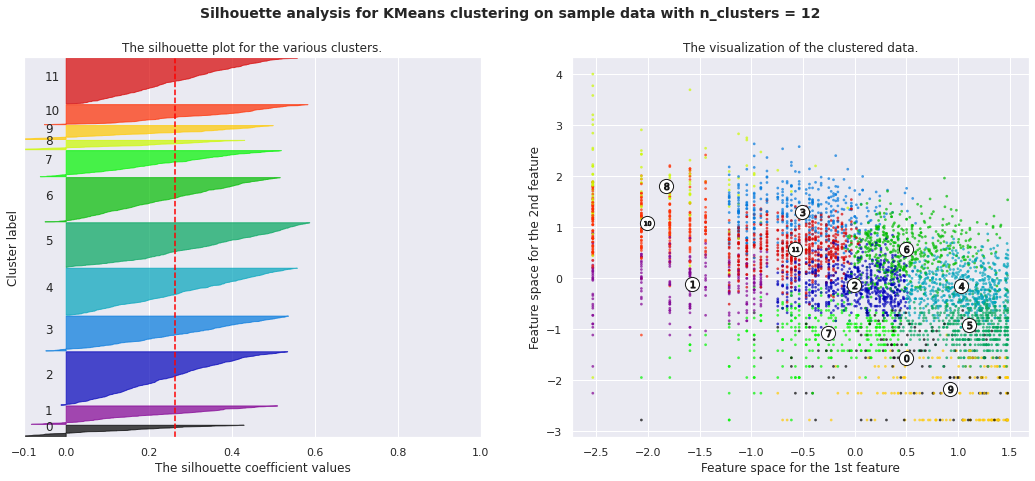

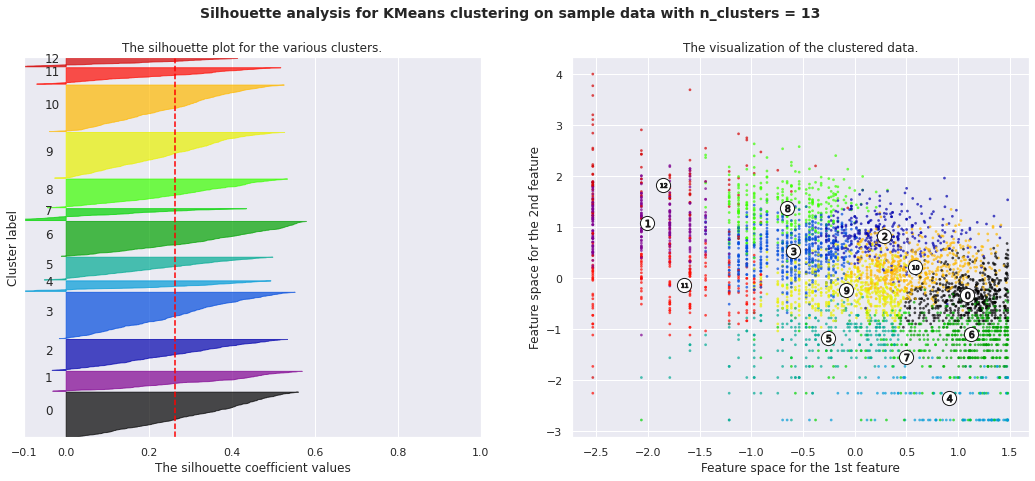

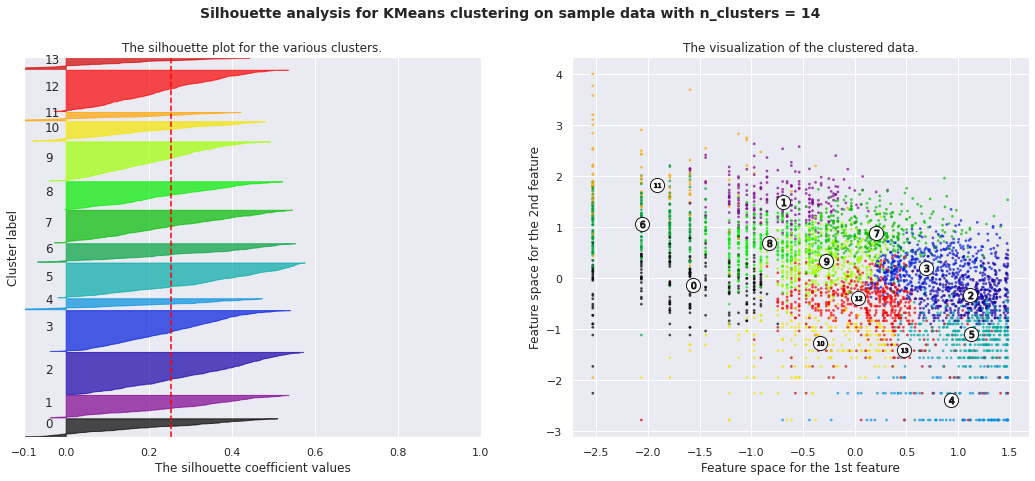

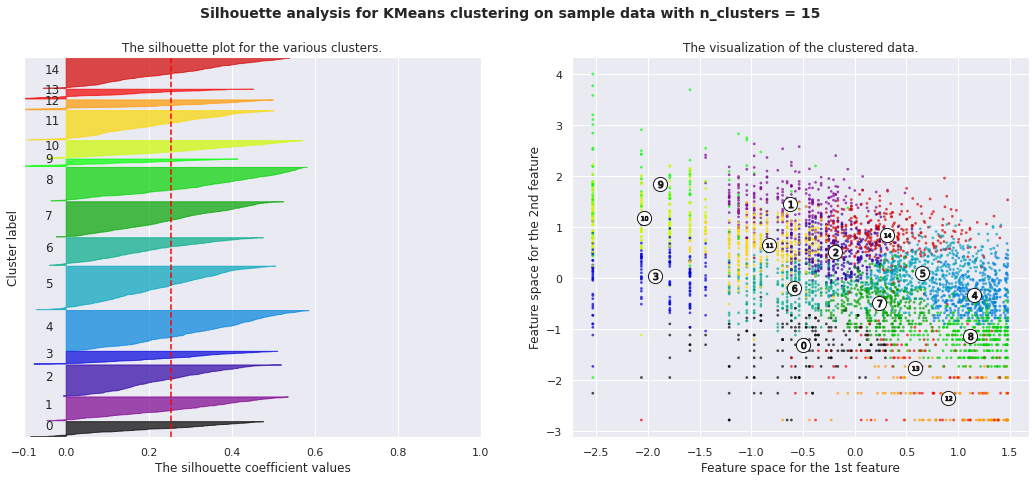

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


# **Observations**
**We got good Silhouette plot for Cluster-2 but still few datapoints are on the negative side of the Silhouette Coefficient value as shown in below figure. but its better than others**

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

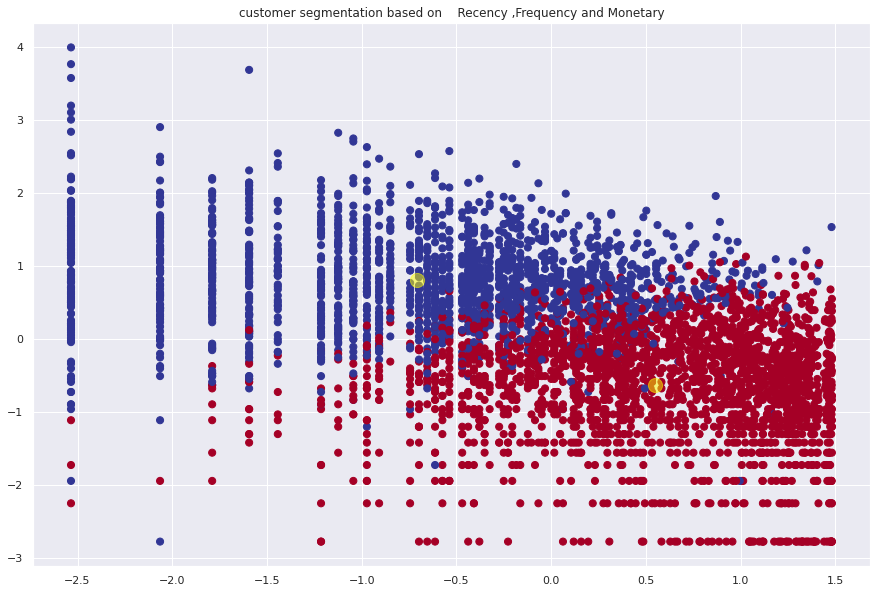

In [ ]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on    Recency ,Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)


# **we see that ,Customers are well separate when we cluster them by Recency ,Frequency and Monetary**

# **Applying Elbow Method on Recency ,Frequency and Monetary**

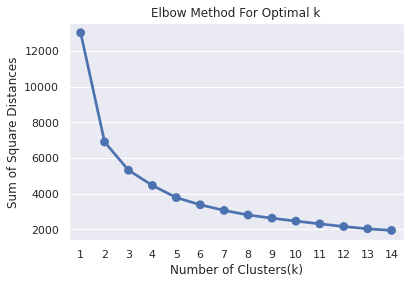

In [ ]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm_df['Cluster_base_on-freq_mon_rec'] = KMean_clust.labels_
rfm_df.head(10)

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346.0         325          1  77183.60  4  4  1      441         9   
12347.0           2        182   4310.00  1  1  1      111         3   
12348.0          75         31   1797.24  3  3  1      331         7   
12349.0          18         73   1757.55  3  2  1      321         6   
12350.0         310         17    334.40  4  4  3      443        11   
12352.0          36         85   2506.04  3  2  1      321         6   
12353.0         204          4     89.00  4  4  4      444        12   
12354.0         232         58   1079.40  4  2  2      422         8   
12355.0         214         13    459.40  4  4  3      443        11   
12356.0          22         59   2811.43  3  2  1      321         6   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  \
CustomerID                                                               
12346.0               Silver     5.783825       0.000000     11.253942   
12347.0            Platinaum     0.693147       5.204007      8.368693   
12348.0                 Gold     4.317488       3.433987      7.494007   
12349.0                 Gold     2.890372       4.290459      7.471676   
12350.0                Bronz     5.736572       2.833213      5.812338   
12352.0                 Gold     3.583519       4.442651      7.826459   
12353.0                Bronz     5.318120       1.386294      4.488636   
12354.0                 Gold     5.446737       4.060443      6.984161   
12355.0                Bronz     5.365976       2.564949      6.129921   
12356.0                 Gold     3.091042       4.077537      7.941449   

            Cluster_based_rec_mon  Cluster_based_fre_mon  \
CustomerID                                                 
12346.0                         1                      0   
12347.0                         1                      0   
12348.0                         1                      0   
12349.0                         1                      0   
12350.0                         0                      1   
12352.0                         1                      0   
12353.0                         0                      1   
12354.0                         0                      0   
12355.0                         0                      1   
12356.0                         1                      0   

            Cluster_base_on-freq_mon_rec  
CustomerID                                
12346.0                                0  
12347.0                                1  
12348.0                                0  
12349.0                                1  
12350.0                                0  
12352.0                                1  
12353.0                                0  
12354.0                                0  
12355.0                                0  
12356.0                                1

# **Hierarchical Clustering**

 
## **How should we Choose the Number of Clusters in Hierarchical Clustering?** 
**A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters.**

**We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line. Find largest vertical distance we can make without crossing any other horizontal line).**

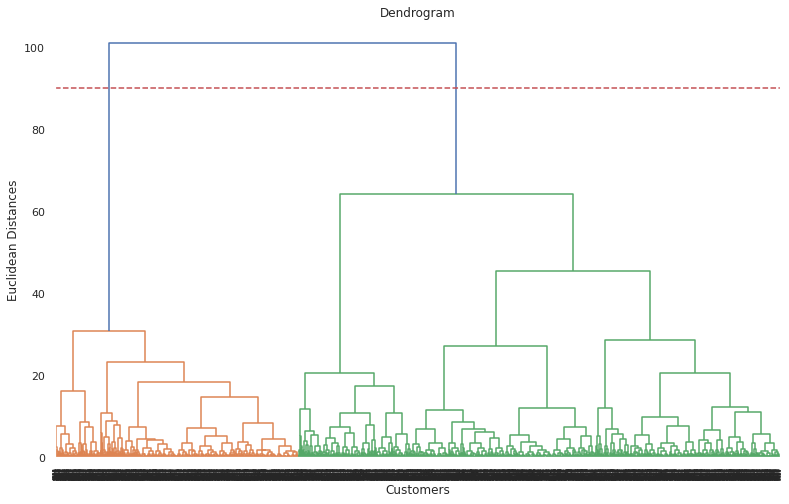

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=90, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

**The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold=90**\
**No. of Cluster = 2**

In [ ]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

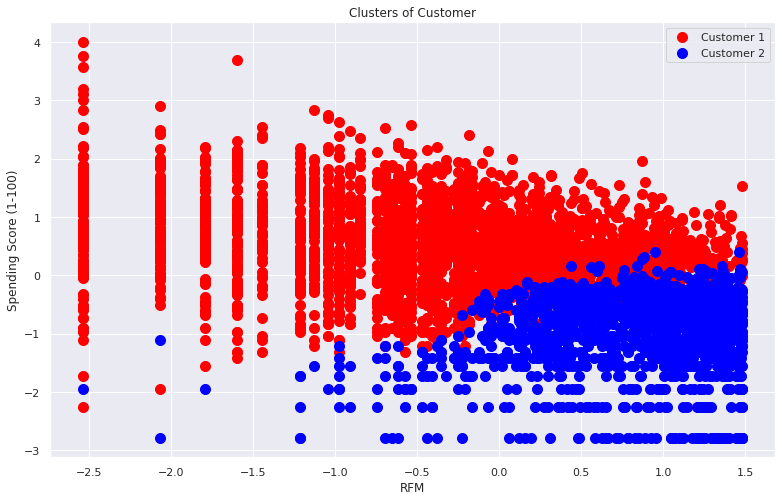

In [ ]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**By applying different clustering algorithem to our dataset .we get the optimal number of cluster is equal to 2**

# **Applying DBSCAN to Recency ,Frequency and Monetary**

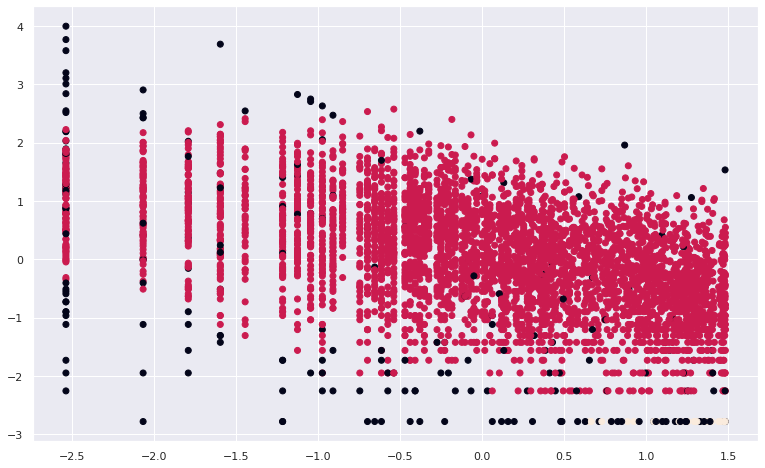

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)


**we see that ,Customers are well separate when we cluster them by Recency ,Frequency and Monetary and optimal number of cluster is equal to 3**

In [ ]:
rfm_df.head(1)

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346.0         325          1   77183.6  4  4  1      441         9   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  \
CustomerID                                                               
12346.0               Silver     5.783825            0.0     11.253942   

            Cluster_based_rec_mon  Cluster_based_fre_mon  \
CustomerID                                                 
12346.0                         1                      0   

            Cluster_base_on-freq_mon_rec  
CustomerID                                
12346.0                                0

In [ ]:
data_process_normalized=rfm_df[['Recency','Frequency','Monetary','Recency_log','Frequency_log','Monetary_log','RFM_Loyalty_Level','Cluster_base_on-freq_mon_rec']]


In [ ]:
data_process_normalized.groupby('Cluster_base_on-freq_mon_rec').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})

Recency            Frequency            \
                                    mean min  max        mean min   max   
Cluster_base_on-freq_mon_rec                                              
0                             140.602226   1  373   24.976092   1   174   
1                              30.485356   1  372  173.692469   1  7676   

                                 Monetary                           
                                     mean     min        max count  
Cluster_base_on-freq_mon_rec                                        
0                              470.947643    3.75   77183.60  2426  
1                             4050.570038  150.61  280206.02  1912


#**Summary**

In [ ]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
myTable.add_row(['1',"K-Means with silhouette_score ", "RM", "2"]) 
myTable.add_row(['2',"K-Means with Elbow methos  ", "RM", "2"])
myTable.add_row(['3',"DBSCAN ", "RM", "2"]) 
myTable.add_row(['4',"K-Means with silhouette_score ", "FM", "2"]) 
myTable.add_row(['5',"K-Means with Elbow methos  ", "FM", "2"])
myTable.add_row(['6',"DBSCAN ", "FM", "2"])

myTable.add_row(['7',"K-Means with silhouette_score ", "RFM", "2"]) 
myTable.add_row(['8',"K-Means with Elbow methos  ", "RFM", "2"])
myTable.add_row(['9',"Hierarchical clustering  ", "RFM", "2"])
myTable.add_row(['10',"DBSCAN ", "RFM", "3"])
print(myTable)

+--------+--------------------------------+------+---------------------------+
| SL No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score  |  RM  |             2             |
|   2    |  K-Means with Elbow methos     |  RM  |             2             |
|   3    |            DBSCAN              |  RM  |             2             |
|   4    | K-Means with silhouette_score  |  FM  |             2             |
|   5    |  K-Means with Elbow methos     |  FM  |             2             |
|   6    |            DBSCAN              |  FM  |             2             |
|   7    | K-Means with silhouette_score  | RFM  |             2             |
|   8    |  K-Means with Elbow methos     | RFM  |             2             |
|   9    |   Hierarchical clustering      | RFM  |             2             |
|   10   |            DBSCAN              | RFM  |  


# **Summary And Conclusion of project**
**Firstly we did clustering based on RFM analysis. We had 4 clusters/Segmentation of customers based on RFM score**


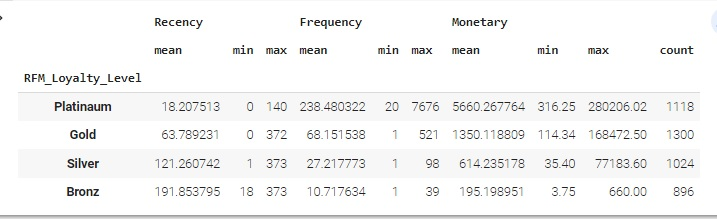

* Platinum customers=1118 ( less recency but high frequency and heavy spendings)
* Gold customers=1300 (good recency,frequncy and moentary)
* Silver customers=1024(high recency, low frequency and low spendings)
* Bronz customers=896 (very high recency but very less frequency and spendings)

**Later we implemented the machine learning algorithms to cluster the customers.**
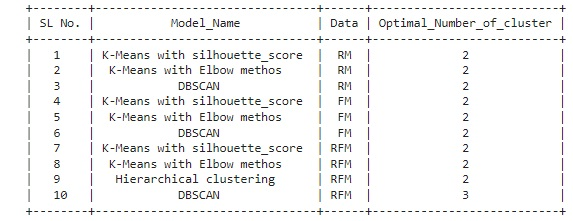

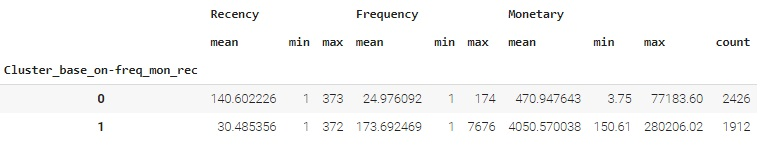

* **Above clustering is done with recency,frequency and monetary data(Kmeans Clustering) as all 3 together will provide more information.**

* **Cluster 0 has high recency rate but very low frequency and monetary. Cluster 0 conatins 2426 customers.**

* **Cluster 1 has low recency rate but they are frequent buyers and spends very high money than other customers as mean monetary value is very high.Thus generates more revnue to the retail business**

* **With this, we are done.Also, we can use more robust analysis for the clustering, using not only RFM but other metrics such as demographics or product features.**